In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np

# <center>Computational Mathematics Report</center>
### <center>Donato Meoli</center>
##### <center>d.meoli@studenti.unipi.it</center>

<center>Computational Mathematics course 646AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: Wildcard #5 with Machine Learning</center>
<center>Group #35</center>

## Track

(M1.1) is a *Support Vector Classifier (SVC)* with the *hinge* loss.

(A1.1.1) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient* method for solving the SVC in its *primal* formulation.

(A1.1.2) is the *Sequential Minimal Optimization (SMO)* algorithm [[2]](#ref-2) (see [[3]](#ref-3) for improvements), an ad-hoc *active set* method for training a SVC in its *Wolfe dual* formulation with *linear*, *polynomial* and *gaussian* kernels.

(A1.1.3) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient* method for solving the SVC in its *Lagrangian dual* formulation with *linear*, *polynomial* and *gaussian* kernels.

(M1.2) is a *Support Vector Classifier (SVC)* with the *squared hinge* loss.

(A1.2.1) is standard *gradient descent* approach for solving the SVC in its *primal* formulation.

(M2.1) is a *Support Vector Regression (SVR)* with the *epsilon-insensitive* loss.

(A2.1.1) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient* method for solving the SVR in its *primal* formulation.

(A2.1.2) is the *Sequential Minimal Optimization (SMO)* algorithm [[4]](#ref-4) (see [[5]](#ref-5) for improvements), an ad-hoc *active set* method for training a SVR in its *Wolfe dual* formulation with *linear*, *polynomial* and *gaussian* kernels.

(A2.1.3) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient* method for solving the SVR in its *Lagrangian dual* formulation with *linear*, *polynomial* and *gaussian* kernels.

(M2.2) is a *Support Vector Regression (SVR)* with the *squared epsilon-insensitive* loss.

(A2.2.1) is a standard *gradient descent* approach for solving the SVR in its *primal* formulation.

## Abstract

The aim of this report is to compare the *primal*, the *Wolfe dual* and the *Lagrangian dual* formulations of a learning model known as *Support Vector Machine* in terms of *numerical precision*, *time*, *accuracy* and *complexity*, i.e., the *number of support vectors*.

Firstly, I will provide a detailed mathematical derivation of the SVM model for the *classification* and the *regression* problem for all the possible formulation, then, for each of them, I will describe an algorithm to solve the optimization problem that arises from the formulation of the problem.

Finally, I will show some experiments for *linearly* and *non-linearly* separable generated datasets to compare the performace of different *kernels*, also by comparing the custom results with *sklearn* SVM implementation and *cvxopt* QP solver.

## Support Vector Machines

A *support vector machine* is a learning model used both for *classification* and *regression* tasks whose goal is to constructs a *maximum margin separator*, a decision boundary with the largest distance from the nearest training data points.

### Support Vector Classifier

#### Linearly Separable Binary Classification

Given $n$ training points, where each input $x_i$ has $m$ attributes, i.e., is of dimensionality $m$, and is in one of two classes $y_{i}=\pm1$, i.e., our training data is of the form:

$$
\{x_i,y_{i}\} \ \text{where} \ i=1, \dots, n, x_i\in\Re^{m}, y_{i}=\pm1
$$

For simplicity we first assume that data are linearly separable, meaning that we can draw a line separating the two classes when $m=2$, a plane for $m=3$ and, more in general, a hyperplane for an arbitrary $m$.

Support vectors are the examples closest to the separating hyperplane and the aim of support vector machines is to orientate this hyperplane in such a way as to be as far as possible from the closest members of both classes, i.e., we need to maximize this margin.

This hyperplane is represented by the equation $\langle w, x \rangle +b=0$ so, we need to find $w$ and $b$ so that our training data can be described by:

$$
\begin{equation}
    \langle w, x_i \rangle +b\geq+1 \ \text{for} \ y_{i}=+1 \tag{1.1}
\end{equation}
$$
$$
\begin{equation}
    \langle w, x_i \rangle +b\leq-1 \ \text{for} \ y_{i}=-1 \tag{1.2}
\end{equation}
$$ 

These equations can be combined into:

$$
\begin{equation}
    y_{i}(\langle w, x_i \rangle +b) \geq 1 \ \forall_{i} \tag{1.3}
\end{equation}
$$ 

The margin is equal to $\displaystyle \frac{1}{\Vert w\Vert}$ and maximizing it subject to the constraint in (1.3) is equivalent to finding:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b} \quad & \Vert w \Vert \\
            \textrm{subject to} \quad & y_{i}(\langle w, x_i \rangle +b) \geq 1 \ \forall_{i}
    \end{aligned} \tag{1.4}
\end{equation}
$$

Minimizing $\Vert w\Vert$ is equivalent to minimizing $\displaystyle \frac{1}{2}\Vert w\Vert^{2}$, so we need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b} \quad & \frac{1}{2} \Vert w \Vert^2 \\
            \textrm{subject to} \quad & y_{i}(\langle w, x_i \rangle +b) \geq 1 \ \forall_{i}
    \end{aligned} \tag{1.5}
\end{equation}
$$

This quadratic optimization problem can be equivalently formulated as: 

$$
\begin{equation}
    \min_{w,b} \frac{1}{2} \Vert w \Vert^2 + \sum_{i=1}^n \max(0, 1 - y_i (\langle w, x_i \rangle + b)) \tag{1.6}
\end{equation}
$$

where we make use of the *hinge* (L1) loss defined as:

$$
\mathcal{L_1} = 
\begin{cases}
0 & \text{if } y (\langle w, x \rangle + b) \geq 1 \\
1 - y (\langle w, x \rangle + b) & \text{otherwise} \\ 
\end{cases} \tag{1.7a}
$$

or, alternatively:

$$
\mathcal{L_1} = \max(0, 1 - y (\langle w, x \rangle + b)) \tag{1.7b}
$$


The *hinge* loss is a convex function and it is not differentiable due to its non-smoothness in 1, but has a subgradient wrt $w$ that is given by:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{L_1}}{\partial w}=
        \begin{cases}
            -y x & \text{if } y (\langle w, x \rangle + b) < 1 \\
            0 & \text{otherwise} \\ 
        \end{cases}\tag{1.8}
\end{equation}
$$

To simplify the notation and so also the algorithms the bias term $b$ is handled by augmenting the vector $w$ and each instance $x_i$ with an additional dimension:

$$
w^T \leftarrow [w^T, b] \\
x_i^T \leftarrow [x_i^T, 1]
$$

So, we can rewrite the (1.6) as follows:

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + \sum_{i=1}^n \max(0, 1 - y_i \langle w, x_i \rangle) \tag{1.9}
\end{equation}
$$

Given a decreasing learning rate, we might end up in a situation where the parameters for common features converge rather quickly to their optimal values, whereas for infrequent features we are still short of observing them sufficiently frequently before their optimal values can be determined. In other words, the learning rate either decreases too quickly for frequent features or too slowly for infrequent ones.

A possible hack to redress this issue would be to count the number of times we see a particular feature and to use this as a clock for adjusting learning rates. That is, rather than choosing a learning rate of the form $\displaystyle \eta = \frac{\eta_0}{\sqrt{t + c}}$ we could use $\displaystyle \eta_i = \frac{\eta_0}{\sqrt{s(i, t) + c}}$ where $s(i, t)$ counts the number of nonzeros for feature $i$ that we have observed up to time $t$. This is actually quite easy to implement at no meaningful overhead. However, it fails whenever we do not quite have sparsity but rather just data where the gradients are often very small and only rarely large. After all, it is unclear where one would draw the line between something that qualifies as an observed feature or not.

*AdaGrad* [[3]](#ref-3) addresses this by replacing the raw counter $s(i, t)$ by an aggregate of the squares of previously observed gradients. In particular, it uses $s(i, t+1) = s(i, t) + \left(\partial_i f(x)\right)^2$ as a means to adjust the learning rate. This has two benefits: first, we no longer need to decide just when a gradient is large enough. Second, it scales automatically with the magnitude of the gradients. Coordinates that routinely correspond to large gradients are scaled down significantly, whereas others with small gradients receive a much more gentle treatment.

We use the variable $s_t$ to accumulate past gradient variance as follows:

$$
\begin{split}
    \begin{aligned}
        {g}_t & = \partial_{{w_t}} \mathcal{L}(y_t, f({x}_t, {w})) \\
        {s}_t & = {s}_{t-1} + {g}_t^2 \\
        {w}_{t+1} & = {w}_{t} - \frac{\eta}{\sqrt{{s}_t + \epsilon}} \cdot {g}_t
    \end{aligned}
\end{split}
$$

where $\epsilon$ is an additive constant that ensures that we do not divide by 0. 

In [3]:
from optiml.ml.svm import PrimalSVC
from optiml.ml.svm.losses import hinge, squared_hinge
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import StochasticGradientDescent, AdaGrad
from optiml.opti.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVC as SKLinearSVC
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	 1.0000e+00	val_loss:  1.0000e+00	acc: 0.4963	val_acc: 0.3333
  50	  50	 5.2527e-02	val_loss:  1.6422e-01	acc: 0.9926	val_acc: 1.0000
 100	 100	 4.0262e-02	val_loss:  1.5488e-01	acc: 0.9926	val_acc: 1.0000
 150	 150	 3.4801e-02	val_loss:  1.5375e-01	acc: 0.9926	val_acc: 1.0000
 200	 200	 3.2499e-02	val_loss:  1.5664e-01	acc: 0.9926	val_acc: 1.0000
 250	 250	 3.1391e-02	val_loss:  1.5848e-01	acc: 1.0000	val_acc: 1.0000
 300	 300	 3.0365e-02	val_loss:  1.6047e-01	acc: 1.0000	val_acc: 1.0000
 350	 350	 2.9860e-02	val_loss:  1.6204e-01	acc: 0.9926	val_acc: 1.0000
 400	 400	 2.9406e-02	val_loss:  1.6361e-01	acc: 1.0000	val_acc: 1.0000
 450	 450	 2.8979e-02	val_loss:  1.6527e-01	acc: 0.9926	val_acc: 1.0000
 500	 500	 2.8620e-02	val_loss:  1.6708e-01	acc: 0.9926	val_acc: 1.0000
 550	 550	 2.8275e-02	val_loss:  1.6895e-01	acc: 0.9926	val_acc: 1.0000
 600	 600	 2.7942e-02	val_loss:  1.7085e-01	acc: 0.9926	val_acc: 1.0000
 650	 650	 2.7631e-02	val_loss:  1.7274e-01	ac

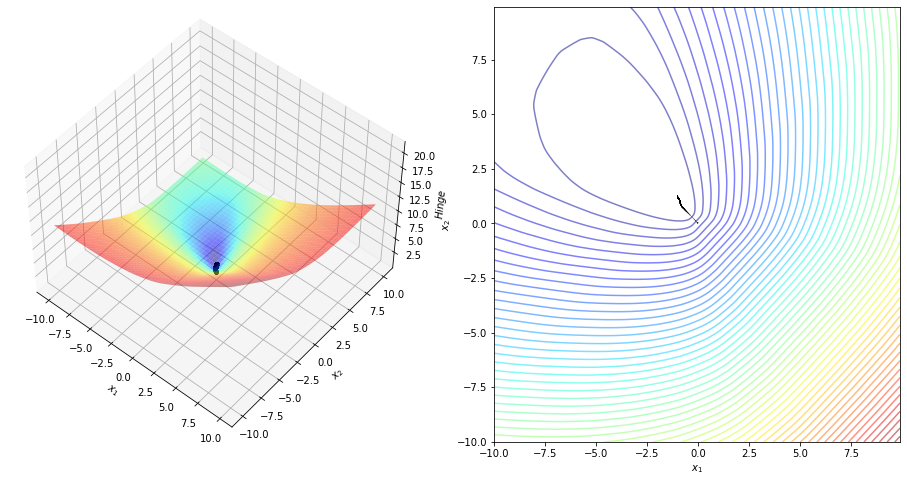

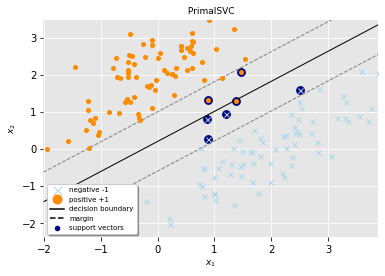

svc accuracy score is 1.0
svc found 7 support vectors from 150 examples
svc w is [-1.01315135  1.25138273]
svc b is -0.2545633402788965

CPU times: user 1.55 ms, sys: 0 ns, total: 1.55 ms
Wall time: 1.42 ms


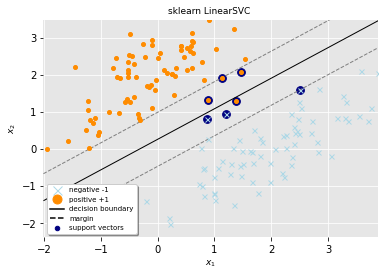

sklearn svc accuracy score is 1.0
sklearn svc found 7 support vectors from 150 examples
sklearn svc w is [[-1.1301008   1.37232926]]
sklearn svc b is [-0.35670098]


In [4]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=hinge, optimizer=AdaGrad, learning_rate=0.1, validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='hinge')
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

However, since the derivative of the *hinge* loss at 1 is undefined, smoothed versions may be preferred for optimization, such as the *squared hinge*:

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + \sum_{i=1}^n \max(0, 1 - y_i \langle w, x_i \rangle)^2 \tag{1.10}
\end{equation}
$$

where we make use of the *squared hinge* (L2) loss.

epoch	iter	 cost	
   0	   0	 1.0000e+00	val_loss:  1.0000e+00	acc: 0.5111	val_acc: 0.6000
  50	  50	 1.4127e-02	val_loss:  7.1293e-02	acc: 1.0000	val_acc: 1.0000
 100	 100	 1.3846e-02	val_loss:  7.7619e-02	acc: 1.0000	val_acc: 1.0000
 150	 150	 1.3887e-02	val_loss:  8.3353e-02	acc: 1.0000	val_acc: 1.0000
 200	 200	 1.4128e-02	val_loss:  8.9466e-02	acc: 1.0000	val_acc: 1.0000
 250	 250	 1.4463e-02	val_loss:  9.5982e-02	acc: 1.0000	val_acc: 1.0000
 300	 300	 1.4649e-02	val_loss:  1.0029e-01	acc: 1.0000	val_acc: 1.0000
 350	 350	 1.4627e-02	val_loss:  1.0217e-01	acc: 1.0000	val_acc: 1.0000
 400	 400	 1.4649e-02	val_loss:  1.0400e-01	acc: 1.0000	val_acc: 1.0000
 450	 450	 1.4646e-02	val_loss:  1.0453e-01	acc: 1.0000	val_acc: 1.0000
 500	 500	 1.4709e-02	val_loss:  1.0505e-01	acc: 1.0000	val_acc: 1.0000
 550	 550	 1.4722e-02	val_loss:  1.0558e-01	acc: 1.0000	val_acc: 1.0000
 600	 600	 1.4738e-02	val_loss:  1.0601e-01	acc: 1.0000	val_acc: 1.0000
 650	 650	 1.4747e-02	val_loss:  1.0661e-01	ac

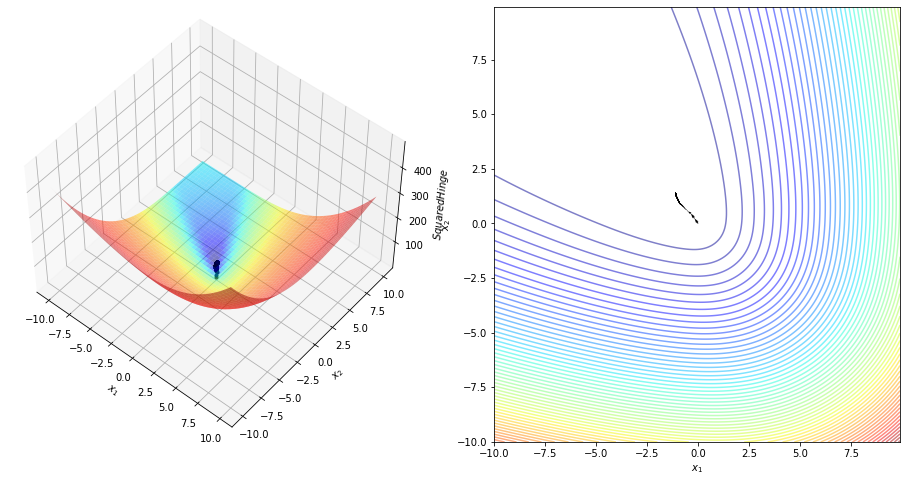

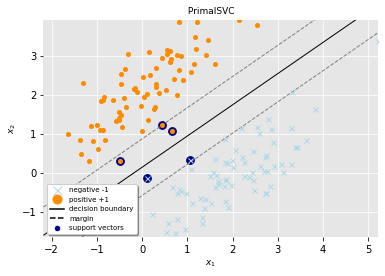

svc accuracy score is 1.0
svc found 5 support vectors from 150 examples
svc w is [-1.10285921  1.37840624]
svc b is -0.20617180125500134

CPU times: user 1.44 ms, sys: 427 µs, total: 1.87 ms
Wall time: 1.68 ms


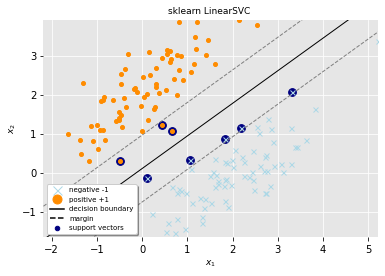

sklearn svc accuracy score is 1.0
sklearn svc found 8 support vectors from 150 examples
sklearn svc w is [[-0.97504596  1.1665311 ]]
sklearn svc b is [-0.13509216]


In [5]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=squared_hinge, optimizer=StochasticGradientDescent, 
                learning_rate=0.1, validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='squared_hinge')
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

To reformulate the (1.5) as a *Wolfe dual*, we need to allocate the Lagrange multipliers $\alpha$, where $\alpha_{i}\geq 0 \ \forall_{i}$:

$$
\begin{align*}
    \max_{\alpha} \min_{w,b} \mathcal{W}(w,b,\alpha) \displaystyle &= \displaystyle \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}(y_{i}(\langle w, x_i \rangle +b)-1) \\
    &= \displaystyle \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}y_{i}(\langle w, x_i \rangle +b)+\sum_{i=1}^{n}\alpha_{i} \tag{1.11}
\end{align*}
$$

We wish to find the $w$ and $b$ which minimizes, and the $\alpha$ which maximizes $\mathcal{W}$, provided $\alpha_{i}\geq 0 \ \forall_{i}$. We can do this by differentiating $\mathcal{W}$ wrt $w$ and $b$ and setting the derivatives to 0:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial w}=w-\sum_{i=1}^{n}\alpha_{i}y_i x_i\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_i x_i \tag{1.12}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial b}=-\sum_{i=1}^{n}\alpha_{i}y_{i}\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.13}
\end{equation}
$$

Substituting (1.12) and (1.13) into (1.11) gives a new formulation which, being dependent on $\alpha$, we need to maximize:

$$
\begin{align*}
    \max_{\alpha} \mathcal{W}(\alpha) \displaystyle &= \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i,j}\alpha_{i}\alpha_{j}y_{i}y_{j} \langle x_i, x_j \rangle \\
    &= \displaystyle \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i,j}\alpha_{i}Q_{ij}\alpha_{j} \ \text{where} \ Q_{ij} = y_{i}y_{j} \langle x_{i}, x_{j} \rangle \\
    &= \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\alpha^{T}Q\alpha \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i}, \displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.14}
\end{align*}
$$

Having moved from minimizing $\mathcal{W}(w,b,\alpha)$ to maximizing $\mathcal{W}(\alpha)$, we need to minimize:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2} \alpha^{T}Q\alpha+q^T\alpha \\
            \textrm{subject to} \quad & \alpha_{i}\geq 0 \ \forall_{i} \\ & y^T\alpha=0
    \end{aligned} \tag{1.15}
\end{equation}
$$

where $q$ is a vector of all 1 introduced to have the formulation in a standard QP form.

By solving (1.15) we will know $\alpha$ and, from (1.12), we will get $w$, so we need to calculate $b.$

We know that any data point satisfying (1.13) which is a support vector $x_{s}$ will have the form:

$$y_{s}(\langle w, x_{s} \rangle +b)=1 \tag{1.16}$$

and, by substituting in (1.12), we get:

$$y_{s}\big(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b\big)=1 \tag{1.17}$$

where $s$ denotes the set of indices of the support vectors and is determined by finding the indices $i$ where $\alpha_{i}>0$, i.e., nonzero Lagrange multipliers. 

Multiplying through by $y_{s}$ and then using $y_{s}^{2}=1$ from (1.1) and (1.2):

$$y_{s}^{2}\big(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b\big)=y_{s} \tag{1.18}$$
$$b=y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle \tag{1.19}$$

Instead of using an arbitrary support vector $x_{s}$, it is better to take an average over all of the support vectors in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S} y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle \tag{1.20}
\end{equation}
$$

We now have the variables $w$ and $b$ that define our separating hyperplane's optimal orientation and hence our support vector machine. Each new point $x'$ is classified by evaluating:

$$
\begin{equation}
    y'=\displaystyle \operatorname{sgn}\big(\sum_{i=1}^{n}\alpha_i y_i\langle x_{i}, x' \rangle+b\big) \tag{1.21}
\end{equation}
$$

The minimization problem (1.15) can be solved using common quadratic programming methods. However, it can be computationally expensive to use QP algorithms, especially since the gram matrix $Q$ may be too large to be stored in memory. Using a *decomposition method* instead can speed up the computation and avoid running out of memory.

*Decomposition methods* (also called *chunking* and *working set* methods) separate all observations into two disjoint sets: the working set and the remaining set. A decomposition method modifies only the elements in the working set in each iteration. Therefore, only some columns of the gram matrix are needed in each iteration, which reduces the amount of storage needed for each iteration.

The *Sequential Minimal Optimization* (SMO) [[1]](#ref-1) method is the most popular approach for solving SVM problems. SMO performs a series of two-point optimizations since we have only one equality constraint $y^T \alpha=0$. At each iteration, a working set of two points are chosen based on a selection rule that uses second-order information. Then the Lagrange multipliers for this working set are solved analytically as follows: first, we initialize $\alpha = 0$, which is a feasible point, since we have $\alpha_{i}\geq 0$ and $y^T \alpha=0$. At each iteration, a working set ${\alpha_i, \alpha_j}$ is selected and the quadratic objective function is minimized along the line $y^T \alpha=0$. Then, the new values for $\alpha_i$ and $\alpha_j$ are clipped to be $\geq 0$ in order to meet the inequality constraint as well.
    
Since the KKT conditions are sufficient for optimality, $\alpha$ is optimal as soon as the conditions are satisfied. In practice, one usually tests whether the largest KKT violation falls below some predefined threshold. If so, the method stops; otherwise, the next iteration starts.

Since the SMO method is designed to deal the equality constraint explicitly we will make use of the formulation (1.15) but, for completeness reasons, we report below the lower bound-constrained dual formulation [[6]](#ref-6) that arises from the primal (1.9) where the bias term $b$ is embedded into the weight vector $w$:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha+q^T\alpha \\
            \textrm{subject to} \quad & \alpha_{i}\geq 0 \ \forall_{i}
    \end{aligned} \tag{1.22}
\end{equation}
$$

where, again, $q$ is a vector of all 1.

In [7]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SklSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-1.0411e+00
   1	-2.6074e+00
   2	-2.6797e+00
   3	-2.7023e+00
   4	-2.7114e+00
   5	-2.7114e+00
   6	-2.7114e+00

CPU times: user 240 ms, sys: 182 ms, total: 421 ms
Wall time: 84.5 ms


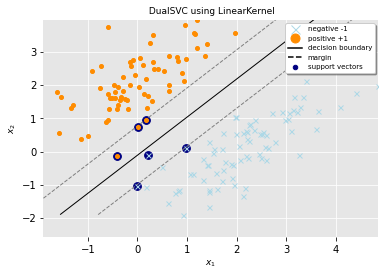

svc accuracy score is 1.0
svc found 6 support vectors from 150 examples
svc w is [-1.30357872  1.13909166]
svc b is 0.12702247899963423

     pcost       dcost       gap    pres   dres
 0: -1.3785e+01 -2.9217e+02  2e+03  3e+00  5e-15
 1: -7.1191e+00 -1.5349e+02  3e+02  3e-01  3e-15
 2: -1.2965e+00 -1.9732e+01  3e+01  2e-02  3e-15
 3: -1.6849e+00 -6.7411e+00  6e+00  5e-03  1e-15
 4: -2.2017e+00 -3.6577e+00  2e+00  1e-03  7e-16
 5: -2.4721e+00 -3.1502e+00  7e-01  3e-04  6e-16
 6: -2.6370e+00 -2.8478e+00  2e-01  9e-05  7e-16
 7: -2.6988e+00 -2.7272e+00  3e-02  3e-07  9e-16
 8: -2.7105e+00 -2.7124e+00  2e-03  1e-08  8e-16
 9: -2.7114e+00 -2.7114e+00  2e-05  1e-10  9e-16
10: -2.7114e+00 -2.7114e+00  2e-07  1e-12  9e-16
Optimal solution found.

CPU times: user 76.2 ms, sys: 80.2 ms, total: 156 ms
Wall time: 25 ms


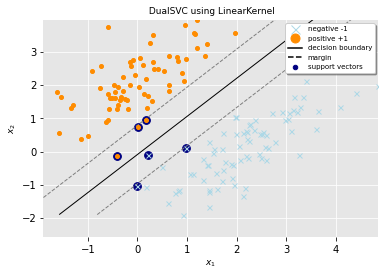

cvxopt svc accuracy score is 1.0
cvxopt svc found 6 support vectors from 150 examples
cvxopt svc w is [-1.30384513  1.13932448]
cvxopt svc b is 0.10249779117910063

CPU times: user 1.48 ms, sys: 468 µs, total: 1.95 ms
Wall time: 1.35 ms


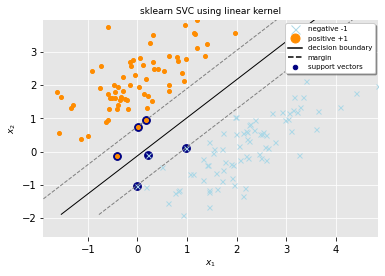

sklearn svc accuracy score is 1.0
sklearn svc found 6 support vectors from 150 examples
sklearn svc w is [[-1.30397729  1.13943995]]
sklearn svc b is [0.14735256]


In [8]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, optimizer=SMOClassifier, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=linear, optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc w is {svc.coef_}')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SklSVC(kernel='linear')
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

In order to relax the constraints in the *Wolfe dual* formulation (1.15) we define the problem as a *Lagrangian dual* relaxation by embedding them into objective function, so we need to allocate the Lagrangian multipliers $\lambda \geq 0$, $\mu \geq 0$:

$$
\begin{align*}
    \max_{\lambda,\mu} \min_{\alpha} \mathcal{L}(\alpha, \lambda, \mu) &= \frac{1}{2} \alpha^{T}Q\alpha+q^T\alpha - \lambda^T \alpha - \mu^T (y^T \alpha) \\
    &= \frac{1}{2} \alpha^{T}Q\alpha+(q-\lambda-\mu y)^T \alpha \tag{1.23}
\end{align*}
$$

Taking the derivative of the Lagrangian $\mathcal{L}$ wrt $\alpha$ and settings it to 0 gives:

$$
\begin{align*}
    \displaystyle \frac{\partial \mathcal{L}}{\partial \alpha}=0\Rightarrow Q \alpha + (q-\lambda-\mu y) = 0 \tag{1.24}
\end{align*}
$$

With $\alpha$ optimal solution of the linear system:

$$
\begin{align*}
    Q \alpha = - (q-\lambda-\mu y) \tag{1.25}
\end{align*}
$$

the gradient wrt $\lambda$ and $\mu$ are:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{L}}{\partial \lambda}=-\alpha \tag{1.26}
\end{equation}
$$

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{L}}{\partial \mu}=-\mu \alpha \tag{1.27}
\end{equation}
$$

If the Hessian matrix Q is indefinite, i.e., the Lagrangian function is not strictly convex since it will be linear along the eigenvectors correspondent to the null eigenvalues, the Lagrangian dual relaxation will be not differentiable, so it will have infinite solutions and for each of them it will have a different subgradient. In order to compute the gradient, we will choose $\alpha^*$ in such a way as the one that minimizes the residue in the least-squares sense.

In [3]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-2.0684e-01	pcost: -2.0684e-01	gap:  0.0000e+00	itn:   2	r1norm: 3.6398e+00

CPU times: user 62.5 ms, sys: 39 ms, total: 102 ms
Wall time: 19.5 ms


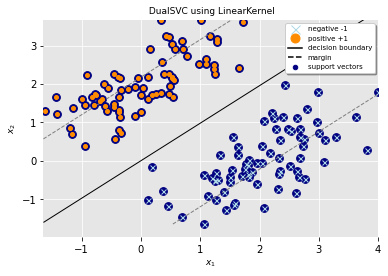

svc accuracy score is 1.0
svc found 150 support vectors from 150 examples
svc w is [-0.44939051  0.46014903]
svc b is -0.0018233819734054964


In [4]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, optimizer=AdaGrad, use_explicit_eq=True, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

From (1.13) we can notice that the equality constraint $y^T \alpha = 0$ arises form the stationarity condition $\partial_{{b}} \mathcal{W}=0$. So, for simplicity, we can again consider the bias term $b$ embedded into the weight vector. In this way the dimensionality of (1.23) is reduced of 1/3 by removing the multipliers $\mu$ which was allocated to control the equality constraint $y^T \alpha=0$, so we will end up solving exactly the problem (1.22).

$$
\begin{align*}
    \max_{\lambda} \min_{\alpha} \mathcal{L}(\alpha, \lambda) &= \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha+q^T\alpha - \lambda^T \alpha \\
    &= \displaystyle \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha + (q - \lambda)^T \alpha \tag{1.28}
\end{align*}
$$

epoch	iter	 cost	
   0	   0	-1.9445e-01	pcost: -1.9449e-01	gap: -3.2461e-05	itn:   3	r1norm: 3.3577e+00

CPU times: user 56.3 ms, sys: 25.8 ms, total: 82.2 ms
Wall time: 15.6 ms


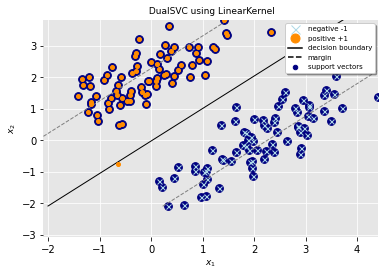

svc accuracy score is 1.0
svc found 149 support vectors from 150 examples
svc w is [-0.44716047  0.43439316]
svc b is 0.00925139091131573


In [5]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, optimizer=AdaGrad, use_explicit_eq=False, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

#### Nonlinearly Separable Binary Classification

In order to extend the SVM methodology to handle data that is not fully linearly separable, we relax the constraints for (1.1) and (1.2) slightly to allow for misclassified points. This is done by introducing a positive slack variable $\xi_{i}, i=1$, $\dots$, $n$ :

$$
\begin{equation}
    \langle w, x_i \rangle +b\geq+1-\xi_{i} \ \text{for} \ y_{i}=+1 \tag{2.1}
\end{equation}
$$
$$
\begin{equation}
    \langle w, x_i \rangle +b\leq-1+\xi_{i} \ \text{for} \ y_{i}=-1 \tag{2.2}
\end{equation}
$$ 

$$\text{where} \ \xi_{i}\geq 0 \ \forall_{i}$$

which can be combined into:

$$
\begin{equation}
    y_{i}(\langle w, x_i \rangle +b) \geq 1 - \xi_{i} \ \forall_{i} \text{where} \ \xi_{i}\geq 0 \ \forall_{i} \tag{2.3}
\end{equation}
$$

In this *soft margin* SVM, data points on the incorrect side of the margin boundary have a penalty that increases with the distance from it. As we are trying to reduce the number of misclassifications, a sensible way to adapt our objective function (1.5) from previously, is to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b,\xi} \quad & \frac{1}{2} \Vert w \Vert^2 + C \sum_{i=1}^{n} \xi_{i} \\
            \textrm{subject to} \quad & y_{i}(\langle w, x_i \rangle +b) \geq 1 - \xi_{i} \ \forall_{i} \\ & \xi_{i} \geq 0 \ \forall_{i}
    \end{aligned} \tag{2.4}
\end{equation}
$$

where the parameter $C$ controls the trade-off between the slack variable penalty and the size of the margin. 

Again, this optimization problem can be formulated with the bias term $b$ embedded into the weight vector $w$ as:

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + C \sum_{i=1}^n \max(0, y_i \langle w, x_i \rangle) \tag{2.5}
\end{equation}
$$

where we make use of the *hinge* (L1) loss.

Please notice that in terms of numerical optimization the formulation (2.4) is not equivalent to the (2.5) since in the first one the bias term $b$ does not contribute to the regularization term by means of $C$; but in machine learning sense, numerical experiments in [[6]](#ref-6) show that the accuracy does not vary much when the bias term $b$ is embedded into the weight vector $w$.

In [6]:
from optiml.ml.svm import PrimalSVC
from optiml.ml.svm.losses import hinge, squared_hinge
from optiml.ml.utils import generate_linearly_separable_overlap_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import StochasticGradientDescent, AdaGrad
from optiml.opti.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVC as SKLinearSVC
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	 1.0000e+00	val_loss:  1.0000e+00	acc: 0.5185	val_acc: 0.4000
  50	  50	 1.2625e-01	val_loss:  2.1012e-01	acc: 0.9704	val_acc: 0.9333
 100	 100	 1.0676e-01	val_loss:  2.0976e-01	acc: 0.9704	val_acc: 0.9333
 150	 150	 9.6831e-02	val_loss:  2.2032e-01	acc: 0.9630	val_acc: 0.9333
 200	 200	 9.0652e-02	val_loss:  2.2945e-01	acc: 0.9630	val_acc: 0.9333
 250	 250	 8.6784e-02	val_loss:  2.3580e-01	acc: 0.9630	val_acc: 0.9333
 300	 300	 8.5272e-02	val_loss:  2.3990e-01	acc: 0.9630	val_acc: 0.9333
 350	 350	 8.4489e-02	val_loss:  2.4616e-01	acc: 0.9704	val_acc: 0.9333
 400	 400	 8.4012e-02	val_loss:  2.5091e-01	acc: 0.9704	val_acc: 0.9333
 450	 450	 8.3746e-02	val_loss:  2.5283e-01	acc: 0.9704	val_acc: 0.9333
 500	 500	 8.3660e-02	val_loss:  2.5360e-01	acc: 0.9704	val_acc: 0.9333
 550	 550	 8.3574e-02	val_loss:  2.5386e-01	acc: 0.9704	val_acc: 0.9333
 600	 600	 8.3490e-02	val_loss:  2.5430e-01	acc: 0.9704	val_acc: 0.9333
 650	 650	 8.3410e-02	val_loss:  2.5493e-01	ac

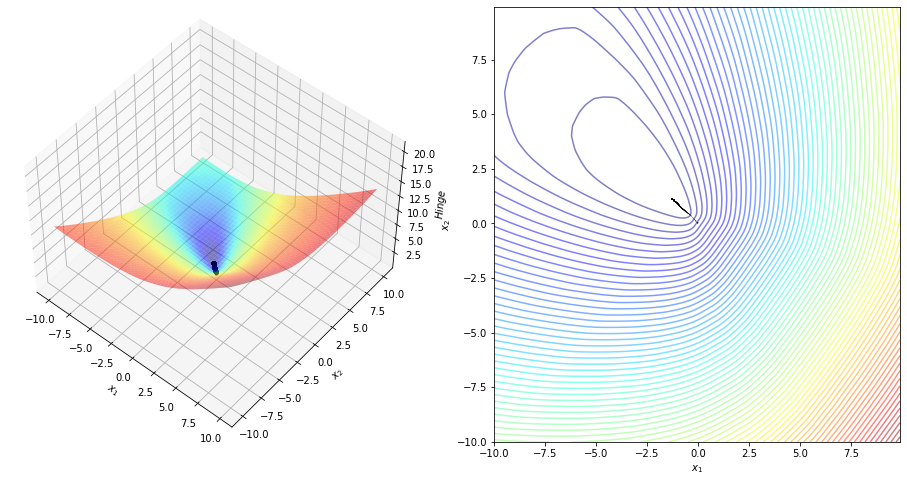

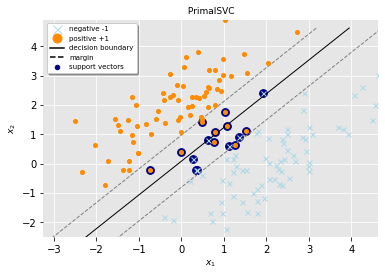

svc accuracy score is 0.98
svc found 16 support vectors from 150 examples
svc w is [-1.29732454  1.12845102]
svc b is -0.09303294351583889

CPU times: user 1.3 ms, sys: 364 µs, total: 1.67 ms
Wall time: 1.48 ms


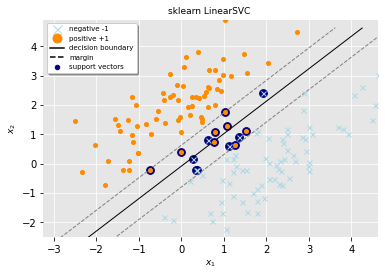

sklearn svc accuracy score is 0.98
sklearn svc found 15 support vectors from 150 examples
sklearn svc w is [[-1.55656904  1.40664082]]
sklearn svc b is [0.12032756]


In [7]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=hinge, optimizer=AdaGrad, learning_rate=0.1, C=1, validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='hinge', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

To provide a continuously differentiable function the optimization problem (2.5) can be formulated as: 

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + C \sum_{i=1}^n \max(0, 1 - y_i \langle w, x_i \rangle)^2 \tag{2.6}
\end{equation}
$$

where we make use of the *squared hinge* (L2) loss.

epoch	iter	 cost	
   0	   0	 1.0000e+00	val_loss:  1.0000e+00	acc: 0.5037	val_acc: 0.5333
  50	  50	 6.6903e-02	val_loss:  8.0142e-02	acc: 0.9852	val_acc: 1.0000
 100	 100	 7.0659e-02	val_loss:  9.7667e-02	acc: 0.9852	val_acc: 1.0000
 150	 150	 7.3285e-02	val_loss:  1.1007e-01	acc: 0.9852	val_acc: 1.0000
 200	 200	 7.5110e-02	val_loss:  1.1701e-01	acc: 0.9852	val_acc: 1.0000
 250	 250	 7.6371e-02	val_loss:  1.2122e-01	acc: 0.9852	val_acc: 1.0000
 300	 300	 7.7665e-02	val_loss:  1.2607e-01	acc: 0.9852	val_acc: 1.0000
 350	 350	 7.8997e-02	val_loss:  1.3084e-01	acc: 0.9778	val_acc: 1.0000
 400	 400	 8.0307e-02	val_loss:  1.3555e-01	acc: 0.9778	val_acc: 1.0000
 450	 450	 8.1125e-02	val_loss:  1.3860e-01	acc: 0.9778	val_acc: 1.0000
 500	 500	 8.1892e-02	val_loss:  1.4148e-01	acc: 0.9778	val_acc: 1.0000
 550	 550	 8.2686e-02	val_loss:  1.4438e-01	acc: 0.9778	val_acc: 1.0000
 600	 600	 8.3037e-02	val_loss:  1.4565e-01	acc: 0.9778	val_acc: 1.0000
 650	 650	 8.3273e-02	val_loss:  1.4667e-01	ac

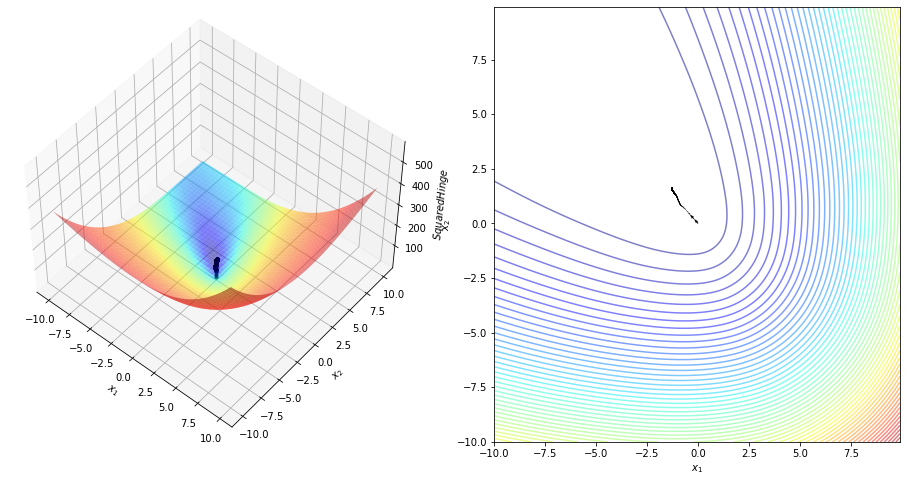

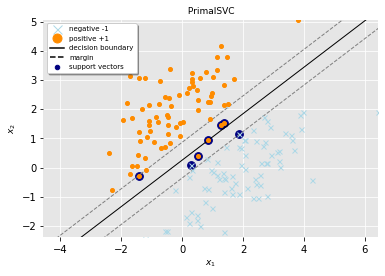

svc accuracy score is 1.0
svc found 7 support vectors from 150 examples
svc w is [-1.30222772  1.63642983]
svc b is -0.4142174446635139

CPU times: user 2.17 ms, sys: 567 µs, total: 2.73 ms
Wall time: 2.22 ms


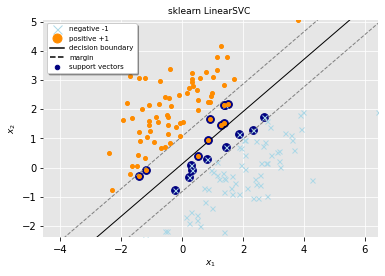

sklearn svc accuracy score is 1.0
sklearn svc found 19 support vectors from 150 examples
sklearn svc w is [[-0.94843977  1.05887703]]
sklearn svc b is [-0.13067946]


In [8]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=squared_hinge, optimizer=StochasticGradientDescent, 
                C=1, learning_rate=0.1, validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='squared_hinge', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

To reformulate the (2.4) as a *Wolfe dual*, which as before we need to minimize wrt $w$, $b$ and $\xi_{i}$ and maximize wrt $\alpha$, provided $\alpha_{i} \geq 0$ and $\mu_{i} \geq 0 \ \forall_{i}$:

$$
\begin{equation}
    \max_{\alpha,\mu} \min_{w,b,\xi} \mathcal{W}(w,b,\xi,\alpha,\mu) \displaystyle = \frac{1}{2}\Vert w\Vert^{2}+C\sum_{i=1}^n\xi_{i}-\sum_{i=1}^n\alpha_{i}(y_{i}(\langle w, {x}_{i} \rangle+b)-1+\xi_{i})-\sum_{i=1}^n\mu_{i}\xi_{i} \tag{2.7}
\end{equation}
$$

Differentiating wrt $w$, $b$ and $\xi_{i}$ and setting the derivatives to 0:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial w}=w-\sum_{i=1}^{n}\alpha_{i}y_{i}x_i\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_{i}x_i \tag{2.8}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial b}=-\sum_{i=1}^{n}\alpha_{i}y_{i}\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{2.9}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial\xi_{i}}=0\Rightarrow C=\alpha_{i}+\mu_{i} \tag{2.10}
\end{equation}
$$

Substituting these in, $\mathcal{W}(\alpha,\mu)$ will have the same form of (1.15). However (2.10) together with $\mu_{i}\geq 0 \ \forall_{i}$, implies that $\alpha\leq C$. We therefore need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2}\alpha^{T}Q\alpha+q^T\alpha \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}\leq C \ \forall_{i} \\ & y^T\alpha=0 
    \end{aligned} \tag{2.11}
\end{equation}
$$

where, again, $q$ is a vector of all 1.

The bias term $b$ is then calculated in the same way as in (1.20) before, though in this instance the set of support vectors used to calculate $b$ is determined by finding the indices $i$ where $0\leq\alpha_{i}\leq C$.

Again, since the SMO method is designed to deal the equality constraint explicitly we will make use of the formulation (2.11) but, for completeness reasons, we report below the box-constrained dual formulation [[6]](#ref-6) that arises from the primal (2.5) where the bias term $b$ is embedded into the weight vector $w$:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha+q^T\alpha \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}\leq C \ \forall_{i}
    \end{aligned} \tag{2.12}
\end{equation}
$$

where, again, $q$ is a vector of all 1.

In [16]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_overlap_data, plot_svm_hyperplane

from sklearn.svm import SVC as SklSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-4.2513e+00
   1	-8.7476e+00
   2	-9.5157e+00
   3	-9.6018e+00
   4	-9.6465e+00
   5	-1.0066e+01
   6	-1.0113e+01
   7	-1.0141e+01
   8	-1.0146e+01
   9	-1.0146e+01
  10	-1.0146e+01

CPU times: user 138 ms, sys: 133 ms, total: 271 ms
Wall time: 76.4 ms


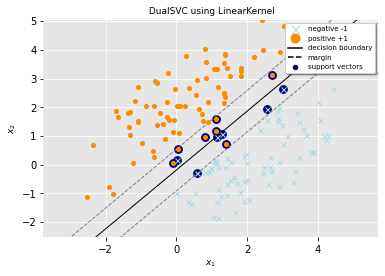

svc accuracy score is 0.98
svc found 14 support vectors from 150 examples
svc w is [-1.41490835  1.38059041]
svc b is 0.26105114865923085

     pcost       dcost       gap    pres   dres
 0: -2.9246e+01 -2.6833e+02  1e+03  2e+00  9e-15
 1: -1.8268e+01 -1.3922e+02  2e+02  3e-01  5e-15
 2: -9.4677e+00 -2.8635e+01  3e+01  3e-02  7e-15
 3: -9.6005e+00 -1.3845e+01  6e+00  6e-03  4e-15
 4: -1.0092e+01 -1.2071e+01  2e+00  2e-03  4e-15
 5: -1.0358e+01 -1.1120e+01  9e-01  4e-04  3e-15
 6: -1.0559e+01 -1.0778e+01  2e-01  1e-16  4e-15
 7: -1.0659e+01 -1.0662e+01  3e-03  2e-16  3e-15
 8: -1.0660e+01 -1.0660e+01  3e-05  2e-16  4e-15
 9: -1.0660e+01 -1.0660e+01  3e-07  2e-16  4e-15
Optimal solution found.

CPU times: user 146 ms, sys: 170 ms, total: 317 ms
Wall time: 79.7 ms


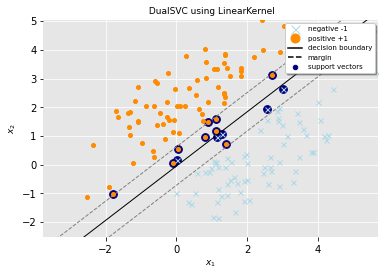

cvxopt svc accuracy score is 0.96
cvxopt svc found 14 support vectors from 150 examples
cvxopt svc w is [-1.4131181   1.49547655]
cvxopt svc b is 0.07839036431256571

CPU times: user 971 µs, sys: 170 µs, total: 1.14 ms
Wall time: 1.16 ms


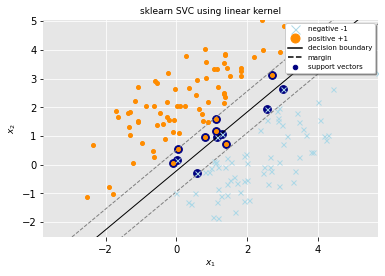

sklearn svc accuracy score is 0.98
sklearn svc found 14 support vectors from 150 examples
sklearn svc w is [[-1.41490837  1.38059038]]
sklearn svc b is [0.30443893]


In [17]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, C=1, optimizer=SMOClassifier, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=linear, C=1, optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc w is {svc.coef_}')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SklSVC(kernel='linear', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

In order to relax the constraints in the *Wolfe dual* formulation (2.11) we define the problem as a *Lagrangian dual* relaxation by embedding them into objective function, so we need to allocate the Lagrangian multipliers $\lambda_+ \geq 0$, $\lambda_- \geq 0$ and $\mu \geq 0$:

$$
\begin{align*}
    \max_{\mu,\lambda_+,\lambda_-} \min_{\alpha} \mathcal{L}(\alpha,\mu,\lambda_+,\lambda_-) &= \frac{1}{2} \alpha^{T}Q\alpha+q^T\alpha - \mu^{T} (y^{T} \alpha) - \lambda_+^T (ub - \alpha) - \lambda_-^T \alpha \\
    &= \displaystyle \frac{1}{2} \alpha^{T}Q\alpha + (q - \mu y + \lambda_+ - \lambda_-)^T \alpha - \lambda_+^T ub \tag{2.13}
\end{align*}
$$

where $ub$, the upper bound, is a vector of all $C$ values.

Taking the derivative of the Lagrangian $\mathcal{L}$ wrt $\alpha$ and settings it to 0 gives:

$$
\begin{align*}
    \displaystyle \frac{\partial \mathcal{L}}{\partial \alpha}=0\Rightarrow Q \alpha + (q - \mu y + \lambda_+ - \lambda_-) = 0 \tag{2.14}
\end{align*}
$$

With $\alpha$ optimal solution of the linear system:

$$
\begin{align*}
    Q \alpha = - (q - \mu y + \lambda_+ - \lambda_-) \tag{2.15}
\end{align*}
$$

the gradient wrt $\lambda_+$, $\lambda_-$ and $\mu$ are:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{L}}{\partial \lambda_+}=\alpha - ub \tag{2.16}
\end{equation}
$$

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{L}}{\partial \lambda_-}=-\alpha \tag{2.17}
\end{equation}
$$

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{L}}{\partial \mu}=-\mu \alpha \tag{2.18}
\end{equation}
$$

In [9]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_overlap_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-1.5241e-01	pcost: -1.5271e-01	gap: -3.0649e-04	itn:   2	r1norm: 5.0093e+00

CPU times: user 123 ms, sys: 109 ms, total: 233 ms
Wall time: 40.8 ms


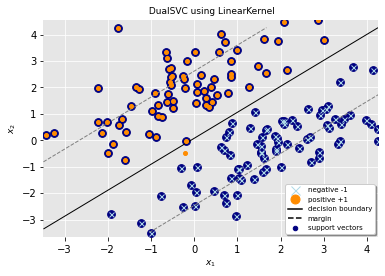

svc accuracy score is 0.98
svc found 149 support vectors from 150 examples
svc w is [-0.38707471  0.39360283]
svc b is -0.029385234328630407


In [10]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, C=1, optimizer=AdaGrad, use_explicit_eq=True, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

From (2.11) we can notice that the equality constraint $y^T \alpha = 0$ arises form the stationarity condition $\partial_{{b}} \mathcal{W}=0$. So, again, for simplicity, we can again consider the bias term $b$ embedded into the weight vector. In this way the dimensionality of (2.13) is reduced of 1/3 by removing the multipliers $\mu$ which was allocated to control the equality constraint $y^T \alpha=0$, so we will end up solving exactly the problem (2.12).

$$
\begin{align*}
    \max_{\lambda_+,\lambda_-} \min_{\alpha} \mathcal{L}(\alpha,\lambda_+,\lambda_-) &= \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha+q^T\alpha - \lambda_+^T (ub - \alpha) - \lambda_-^T \alpha \\
    &= \displaystyle \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha + (q + \lambda_+ - \lambda_-)^T \alpha - \lambda_+^T ub \tag{2.19}
\end{align*}
$$

where $ub$, the upper bound, is a vector of all $C$ values.

epoch	iter	 cost	
   0	   0	-1.6446e-01	pcost: -1.6480e-01	gap: -3.4009e-04	itn:   3	r1norm: 5.0200e+00

CPU times: user 116 ms, sys: 97.4 ms, total: 213 ms
Wall time: 36.6 ms


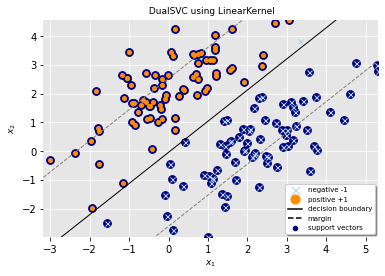

svc accuracy score is 1.0
svc found 149 support vectors from 150 examples
svc w is [-0.421471    0.38884462]
svc b is 0.014952325946518115


In [11]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, C=1, optimizer=AdaGrad, use_explicit_eq=False, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

### Support Vector Regression

In the case of regression the goal is to predict a real-valued output for $y'$ so that our training data is of the form:

$$
\{x_i,y_i\} \text{where i}=1, \dots, n, x\in\Re^{m}, y_{i}\in\Re
$$

The regression SVM use a loss function that not allocating a penalty if the predicted value $y'_{i}$ is less than a distance $\epsilon$ away from the actual value $y_{i}$, i.e., if $|y_{i}-y'_{i}| \leq \epsilon$, where $y'_{i} = \langle w, x_i \rangle + b$. This is formally described by:

$$
\mathcal{L_\epsilon} = 
\begin{cases}
0 & \text{if } |y - y'| \leq \epsilon \\
|y - y'| - \epsilon & \text{otherwise} \\ 
\end{cases} \tag{3.1a}
$$

or, alternatively:

$$
\mathcal{L_\epsilon} = \max(0, |y - y'| - \epsilon) \tag{3.1b}
$$

As the *hinge* loss, also the *epsilon insensitive* loss is a convex function and it is not differentiable due to its non-smoothness in $\pm\epsilon$, but has a subgradient wrt $w$ that is given by:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{L_\epsilon}}{\partial w}=
        \begin{cases}
            (y - y') x & \text{if } |y - y'| > \epsilon \\
            0 & \text{otherwise} \\ 
        \end{cases} \tag{3.2}
\end{equation}
$$

The region bound by $y'_{i}\pm\epsilon \ \forall_{i}$ is called an $\epsilon$-insensitive tube. The output variables which are outside the tube are given one of two slack variable penalties depending on whether they lie above, $\xi^{+}$, or below, $\xi^{-}$, the tube, provided $\xi^{+} \geq 0$ and $\xi^{-} \geq 0 \ \forall_{i}$:

$$
\begin{equation}
    y_{i}\leq y'_{i}+\epsilon+\xi^{+} \tag{3.3}
\end{equation}
$$
$$
\begin{equation}
    y_{i}\geq y'_{i}-\epsilon-\xi^{-} \tag{3.4}
\end{equation}
$$

The error function for SVM regression can then be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b,\xi^{+},\xi^{-}} \quad & \frac{1}{2}\Vert w\Vert^{2} + C \sum_{i=1}^{n}(\xi_{i}^{+}+\xi_{i}^{-}) \\
            \textrm{subject to} \quad & y_{i} - \langle w, x_i \rangle - b \leq \epsilon + \xi_{i}^{+} \ \forall_{i} \\ & \langle w, x_i \rangle + b - y_{i} \leq \epsilon + \xi_{i}^{-} \ \forall_{i} \\ & \xi_{i}^{+}, \xi_{i}^{-} \geq 0 \ \forall_{i}
    \end{aligned} \tag{3.5}
\end{equation}
$$

This optimization problem can be formulated with the bias term $b$ embedded into the weight vector $w$ as:

$$
\begin{equation}
    \min_ {w} \frac{1}{2} \Vert w\Vert^{2} + C \sum_{i=1}^n \max(0, |y_i - \langle w, x_i \rangle| - \epsilon) \tag{3.6}
\end{equation}
$$

where we make use of the *epsilon-insensitive* (L1) loss.

In [12]:
from optiml.ml.svm import PrimalSVR
from optiml.ml.svm.losses import epsilon_insensitive, squared_epsilon_insensitive
from optiml.ml.utils import plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import StochasticGradientDescent, AdaGrad
from optiml.opti.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVR as SKLinearSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	 5.0209e+01	val_loss:  4.0808e+01	r2: -0.0102
 100	 100	 3.8825e+01	val_loss:  5.1225e+01	r2:  0.4680
 200	 200	 3.5279e+01	val_loss:  6.1997e+01	r2:  0.6150
 300	 300	 3.3172e+01	val_loss:  7.3385e+01	r2:  0.7057
 400	 400	 3.1760e+01	val_loss:  8.4490e+01	r2:  0.7688
 500	 500	 3.0757e+01	val_loss:  9.5088e+01	r2:  0.8152
 600	 600	 3.0025e+01	val_loss:  1.0510e+02	r2:  0.8506
 700	 700	 2.9504e+01	val_loss:  1.1450e+02	r2:  0.8781
 800	 800	 2.9117e+01	val_loss:  1.2330e+02	r2:  0.8998
 900	 900	 2.8827e+01	val_loss:  1.3150e+02	r2:  0.9172
1000	1000	 2.8611e+01	val_loss:  1.3912e+02	r2:  0.9312
1100	1100	 2.8451e+01	val_loss:  1.4620e+02	r2:  0.9425
1200	1200	 2.8333e+01	val_loss:  1.5276e+02	r2:  0.9518
1300	1300	 2.8248e+01	val_loss:  1.5883e+02	r2:  0.9593
1400	1400	 2.8190e+01	val_loss:  1.6444e+02	r2:  0.9656
1500	1500	 2.8151e+01	val_loss:  1.6961e+02	r2:  0.9707
1600	1600	 2.8139e+01	val_loss:  1.7437e+02	r2:  0.9749
1700	1700	 2.8144e+01	val_loss

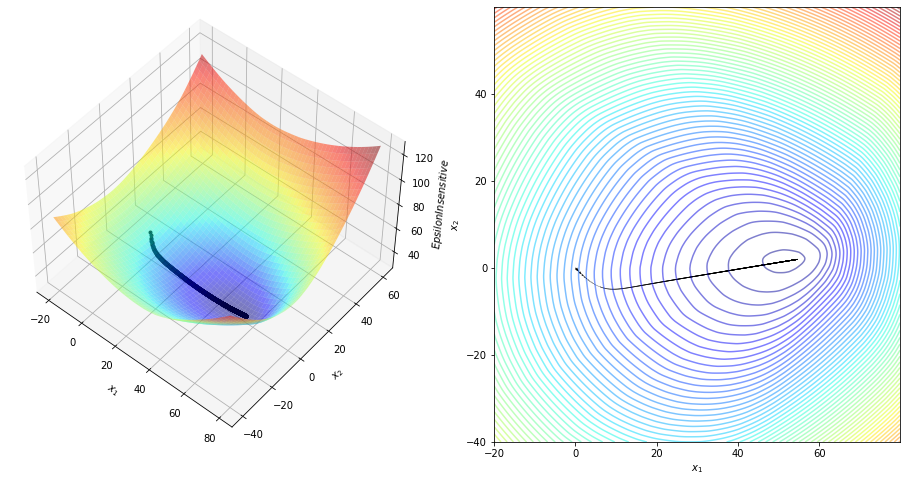

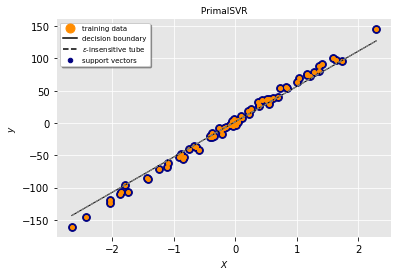

svr r2 score is 0.990246176923605
svr found 100 support vectors from 75 examples
svr w is [54.58106779]
svr b is 1.950175007063133

CPU times: user 448 µs, sys: 52 µs, total: 500 µs
Wall time: 397 µs


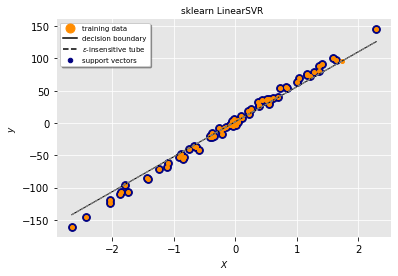

sklearn svr r2 score is 0.9887912513936986
sklearn svr found 98 support vectors from 75 examples
sklearn svr w is [54.09275935]
sklearn svr b is [1.91473897]


In [13]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = PrimalSVR(loss=epsilon_insensitive, epsilon=0.1, optimizer=AdaGrad, C=1, 
                learning_rate=0.95, max_iter=2000, validation_split=0.1, verbose=100)
%time svr.fit(X_train, y_train)
plot_trajectory_optimization(svr.loss, svr.optimizer, x_min=-20, x_max=80, y_min=-40, y_max=60)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

print()

svr = SKLinearSVR(loss='epsilon_insensitive', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'sklearn svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr w is {svr.coef_}')
print(f'sklearn svr b is {svr.intercept_}')

To provide a continuously differentiable function the optimization problem (3.6) can be formulated as: 

$$
\begin{equation}
    \min_ {w} \frac{1}{2} \Vert w\Vert^{2} + C \sum_{i=1}^n \max(0, |y_i - \langle w, x_i \rangle| - \epsilon)^2 \tag{3.7}
\end{equation}
$$

where we make use of the *squared epsilon-insensitive* (L2) loss.

epoch	iter	 cost	
   0	   0	 4.0384e+03	val_loss:  4.3483e+03	r2: -0.0017
  50	  50	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 100	 100	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 150	 150	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 200	 200	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 250	 250	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 300	 300	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 350	 350	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 400	 400	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 450	 450	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 500	 500	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 550	 550	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 600	 600	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 650	 650	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 700	 700	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 750	 750	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 800	 800	 4.0522e+01	val_loss:  2.3298e+02	r2:  0.9964
 850	 850	 4.0522e+01	val_loss

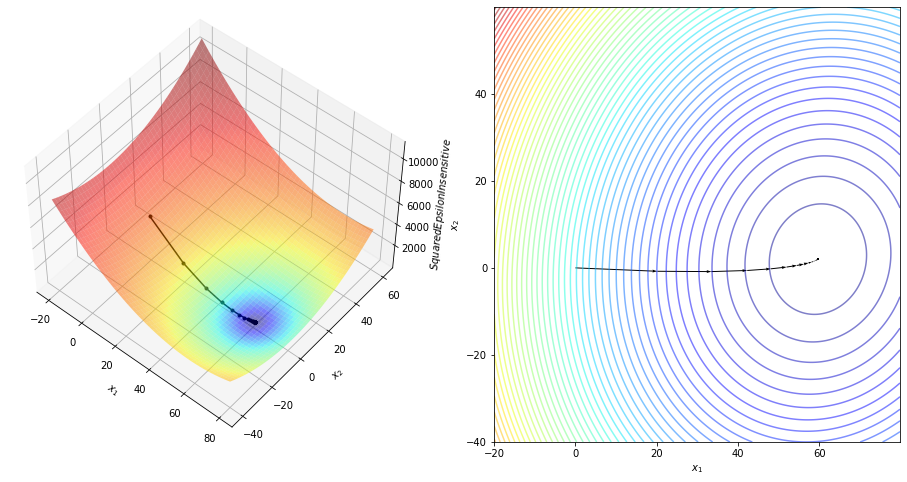

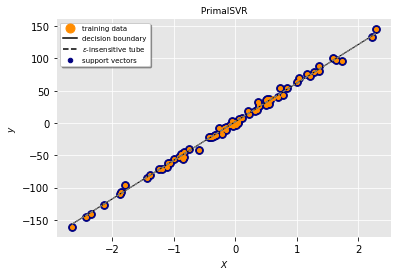

svr r2 score is 0.995570593638441
svr found 99 support vectors from 75 examples
svr w is [59.69914022]
svr b is 2.0103382321074084

CPU times: user 1.33 ms, sys: 109 µs, total: 1.44 ms
Wall time: 873 µs


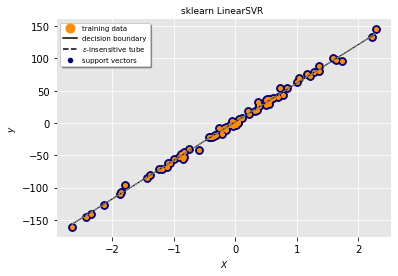

sklearn svr r2 score is 0.9955126494119593
sklearn svr found 100 support vectors from 75 examples
sklearn svr w is [59.68378116]
sklearn svr b is [1.87451311]


In [14]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = PrimalSVR(loss=squared_epsilon_insensitive, epsilon=0.1, C=1, optimizer=StochasticGradientDescent, 
                learning_rate=0.15, validation_split=0.1, verbose=50)
%time svr.fit(X_train, y_train)
plot_trajectory_optimization(svr.loss, svr.optimizer, x_min=-20, x_max=80, y_min=-40, y_max=60)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

print()

svr = SKLinearSVR(loss='squared_epsilon_insensitive', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'sklearn svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr w is {svr.coef_}')
print(f'sklearn svr b is {svr.intercept_}')

To reformulate the (3.5) as a *Wolfe dual*, we introduce Lagrange multipliers $\alpha_{i}^{+}\geq 0, \alpha_{i}^{-}\geq 0, \mu_{i}^{+}\geq 0, \mu_{i}^{-}\geq 0 \ \forall_{i}$:

$$
\begin{align*}
    \max_{\alpha^+,\alpha^-,\mu^+,\mu^-} \min_{w,b,\xi^+,\xi^-} \mathcal{W}(w,b,\xi^+,\xi^-,\alpha^+,\alpha^-,\mu^+,\mu^-) \displaystyle = \frac{1}{2}\Vert w\Vert^{2}+C \sum_{i=1}^n(\xi_{i}^{+}+\xi_{i}^{-})-\sum_{i=1}^n(\mu_{i}^{+}\xi_{i}^{+}+\mu_{i}^{-}\xi_{i}^{-}) \\ -\sum_{i=1}^n\alpha_{i}^{+}(\epsilon+\xi_{i}^{+}+y'_{i}-y_{i})-\sum_{i=1}^n\alpha_{i}^{-}(\epsilon+\xi_{i}^{-}-y'_{i}+y_{i}) \tag{3.8}
\end{align*}
$$

Substituting for $y_{i}$, differentiating wrt $w, b, \xi^{+}$, $\xi^{-}$ and setting the derivatives to $0$:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial w}=w-\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})x_{i}\Rightarrow w=\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})x_{i} \tag{3.9}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial b}=-\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})\Rightarrow \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})=0 \tag{3.10}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial\xi_{i}^{+}}=0\Rightarrow C=\alpha_{i}^{+}+\mu_{i}^{+} \tag{3.11}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial\xi_{i}^{-}}=0\Rightarrow C=\alpha_{i}^{-}+\mu_{i}^{-} \tag{3.12}
\end{equation}
$$

Substituting (3.9) and (3.10) in, we now need to maximize $\mathcal{W}$ wrt $\alpha_{i}^{+}$ and $\alpha_{i}^{-}$, where $\alpha_{i}^{+}\geq 0,\ \alpha_{i}^{-}\geq 0 \ \forall_{i}$:

$$
\begin{equation}
    \max_{\alpha^+,\alpha^-} \mathcal{W}(\alpha^+,\alpha^-) = \displaystyle \sum_{i=1}^{n}y_{i}(\alpha_{i}^{+}-\alpha_{i}^{-})-\epsilon\sum_{i=1}^{n}(\alpha_{i}^{+}+\alpha_{i}^{-})-\frac{1}{2}\sum_{i,j}(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_i, x_j \rangle(\alpha_{j}^{+}-\alpha_{j}^{-}) \tag{3.13}
\end{equation}
$$

Using $\mu_{i}^{+}\geq 0$ and $\mu_{i}^{-}\geq 0$ together with (3.9) and (3.10) means that $\alpha_{i}^{+}\leq C$ and $\alpha_{i}^{-}\leq C$. We therefore need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha^+,\alpha^-} \quad & \frac{1}{2}(\alpha^{+}-\alpha^{-})^TQ(\alpha^{+}-\alpha^{-})+\epsilon q^T(\alpha^{+}+\alpha^{-})-y^T(\alpha^{+}-\alpha^{-}) \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}^{+},\alpha_{i}^{-}\leq C \ \forall_{i} \\ & q^T(\alpha^{+}-\alpha^{-})=0
    \end{aligned} \tag{3.14}
\end{equation}
$$

where, again, $q$ is a vector of all 1.

We can write the (3.14) in a standard quadratic form as:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2}\alpha^{T}H\alpha-q^T\alpha \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}\leq C \ \forall_{i} \\ & e^T\alpha=0 
    \end{aligned} \tag{3.15}
\end{equation}
$$

where the Hessian matrix $H$ is 
$
\begin{bmatrix}
Q & -Q\\
-Q & Q 
\end{bmatrix}$
, $q$ is 
$
\begin{bmatrix}
-y\\
y
\end{bmatrix}$ + $\epsilon$
, and $e$ is 
$
\begin{bmatrix}
1\\
-1
\end{bmatrix}$.

Each new predictions $y'$ can be found using:

$$
\begin{equation}
    y'=\displaystyle \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_{i}, x' \rangle+b \tag{3.16}
\end{equation}
$$

A set $S$ of support vectors $x_{s}$ can be created by finding the indices $i$ where $0\leq\alpha\leq C$ and $\xi_{i}^{+}=0$ or $\xi_{i}^{-}=0$.

This gives us:

$$
\begin{equation}
    b=y_{s}-\displaystyle \epsilon-\sum_{m\in S}(\alpha_m^+ -\alpha_m^-) \langle x_{m}, x_{s} \rangle \tag{3.17}
\end{equation}
$$

As before it is better to average over all the indices $i$ in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S}y_{s}-\epsilon-\sum_{m\in S}(\alpha_{m}^{+}-\alpha_{m}^{-})\langle x_{m}, x_{s} \rangle \tag{3.18}
\end{equation}
$$

In [23]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.smo import SMORegression
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import plot_svm_hyperplane

from sklearn.svm import SVR as SklSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

iter	 cost
   0	-1.8491e+03
   1	-1.8491e+03
   2	-1.8875e+03
   3	-1.8908e+03
   4	-1.8908e+03
   5	-1.8915e+03
   6	-1.8917e+03
   7	-1.8919e+03
   8	-1.8919e+03
   9	-1.8919e+03

CPU times: user 68.4 ms, sys: 59.7 ms, total: 128 ms
Wall time: 37.7 ms


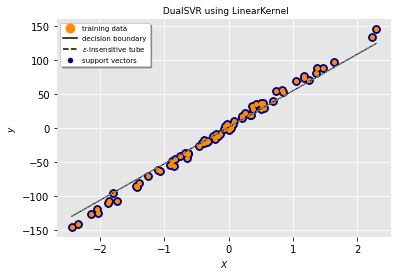

svr r2 score is 0.98338004874927
svr found 75 support vectors from 75 examples
svr w is [53.63769312]
svr b is 1.2535357504572957

     pcost       dcost       gap    pres   dres
 0: -2.8102e+03 -2.6365e+03  9e+03  7e+00  2e-16
 1: -2.0370e+03 -2.4739e+03  1e+03  9e-01  3e-16
 2: -1.9296e+03 -2.1787e+03  5e+02  3e-01  2e-16
 3: -1.8923e+03 -2.0108e+03  2e+02  1e-01  2e-16
 4: -1.8852e+03 -1.9044e+03  3e+01  1e-02  2e-16
 5: -1.8912e+03 -1.8940e+03  3e+00  1e-03  1e-16
 6: -1.8922e+03 -1.8925e+03  3e-01  8e-05  2e-16
 7: -1.8923e+03 -1.8923e+03  5e-02  1e-05  1e-16
 8: -1.8923e+03 -1.8923e+03  3e-03  6e-07  2e-16
 9: -1.8923e+03 -1.8923e+03  3e-05  6e-09  2e-16
Optimal solution found.

CPU times: user 124 ms, sys: 151 ms, total: 275 ms
Wall time: 91 ms


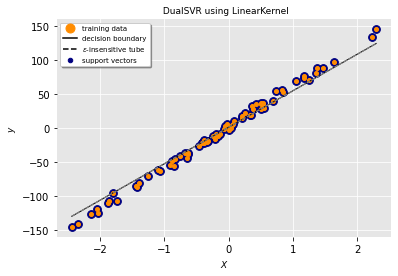

cvxopt svr r2 score is 0.9833639143175251
cvxopt svr found 75 support vectors from 75 examples
cvxopt svr w is [53.63457911]
cvxopt svr b is 1.2414118403321694

CPU times: user 1.69 ms, sys: 97 µs, total: 1.79 ms
Wall time: 1.23 ms


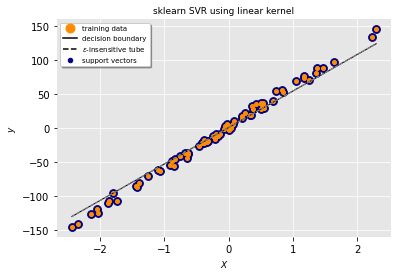

sklearn svr r2 score is 0.9831967715896704
sklearn svr found 75 support vectors from 75 examples
sklearn svr w is [[53.63769329]]
sklearn svr b is [0.86816405]


In [24]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=linear, epsilon=0.1, C=1, optimizer=SMORegression, verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

print()

svr = DualSVR(kernel=linear, epsilon=0.1, C=1, optimizer='cvxopt', verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'cvxopt svr r2 score is {svr.score(X_test, y_test)}')
print(f'cvxopt svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svr w is {svr.coef_}')
print(f'cvxopt svr b is {svr.intercept_}')

print()

svr = SklSVR(kernel='linear', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr w is {svr.coef_}')
print(f'sklearn svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.13) is:

In [15]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-1.8198e+03	pcost: -1.3624e+03	gap:  3.3565e-01	itn:   1	r1norm: 5.2675e+01
 100	 100	-1.7761e+03	pcost: -1.3624e+03	gap:  3.0360e-01	itn:   1	r1norm: 5.4118e+01
 200	 200	-1.7569e+03	pcost: -1.3624e+03	gap:  2.8951e-01	itn:   1	r1norm: 5.5771e+01
 300	 300	-1.7422e+03	pcost: -1.3624e+03	gap:  2.7875e-01	itn:   1	r1norm: 5.7415e+01
 400	 400	-1.7299e+03	pcost: -1.3624e+03	gap:  2.6973e-01	itn:   1	r1norm: 5.9032e+01
 500	 500	-1.7192e+03	pcost: -1.3624e+03	gap:  2.6182e-01	itn:   1	r1norm: 6.0617e+01
 600	 600	-1.7095e+03	pcost: -1.3624e+03	gap:  2.5469e-01	itn:   1	r1norm: 6.2168e+01
 700	 700	-1.7006e+03	pcost: -1.3624e+03	gap:  2.4816e-01	itn:   1	r1norm: 6.3687e+01
 800	 800	-1.6923e+03	pcost: -1.3624e+03	gap:  2.4211e-01	itn:   1	r1norm: 6.5173e+01
 900	 900	-1.6846e+03	pcost: -1.3624e+03	gap:  2.3644e-01	itn:   1	r1norm: 6.6629e+01

CPU times: user 7.05 s, sys: 6.33 s, total: 13.4 s
Wall time: 1.87 s


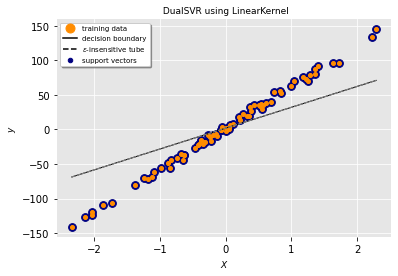

svr r2 score is 0.7192759664474933
svr found 74 support vectors from 75 examples
svr w is [30.16420624]
svr b is 1.8814327750930313


In [16]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=linear, epsilon=0.1, C=1, optimizer=AdaGrad, use_explicit_eq=True, verbose=100)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.19) is:

epoch	iter	 cost	
   0	   0	-1.8165e+03	pcost: -1.3571e+03	gap:  3.3851e-01	itn:   2	r1norm: 4.6249e+01
 100	 100	-1.7736e+03	pcost: -1.3571e+03	gap:  3.0691e-01	itn:   2	r1norm: 4.7468e+01
 200	 200	-1.7547e+03	pcost: -1.3571e+03	gap:  2.9302e-01	itn:   2	r1norm: 4.9190e+01
 300	 300	-1.7404e+03	pcost: -1.3571e+03	gap:  2.8243e-01	itn:   2	r1norm: 5.0940e+01
 400	 400	-1.7283e+03	pcost: -1.3571e+03	gap:  2.7354e-01	itn:   2	r1norm: 5.2676e+01
 500	 500	-1.7177e+03	pcost: -1.3571e+03	gap:  2.6575e-01	itn:   2	r1norm: 5.4384e+01
 600	 600	-1.7082e+03	pcost: -1.3571e+03	gap:  2.5873e-01	itn:   2	r1norm: 5.6060e+01
 700	 700	-1.6995e+03	pcost: -1.3571e+03	gap:  2.5230e-01	itn:   2	r1norm: 5.7702e+01
 800	 800	-1.6914e+03	pcost: -1.3571e+03	gap:  2.4634e-01	itn:   2	r1norm: 5.9312e+01
 900	 900	-1.6838e+03	pcost: -1.3571e+03	gap:  2.4075e-01	itn:   2	r1norm: 6.0892e+01

CPU times: user 9.02 s, sys: 8.37 s, total: 17.4 s
Wall time: 2.39 s


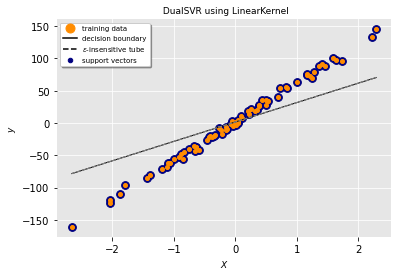

svr r2 score is 0.7183812504381393
svr found 75 support vectors from 75 examples
svr w is [30.02589261]
svr b is 1.5356875359109143


In [17]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=linear, epsilon=0.1, C=1, optimizer=AdaGrad, use_explicit_eq=False, verbose=100)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

### Nonlinear Support Vector Machines

When applying our SVM to linearly separable data we have started by creating a matrix $Q$ from the dot product of our input variables:

$$ Q_{ij}=y_{i}y_{j}k(x_{i},\ x_{j})= \langle x_{i}, x_{j} \rangle=x_{i}^{T}x_{j} $$

$k(x_{i},x_{j})$ is an example of a family of functions called *kernel functions* where $k(x_{i},x_{j})=\langle x_{i}, x_{j} \rangle$ being known as a *linear* kernel. The set of kernel functions is composed of variants of (3.1) in that they are all based on calculating inner products of two vectors. This means that if the functions can be recast into a higher dimensionality space by some potentially nonlinear feature mapping function $x\rightarrow \phi(x)$, only inner products of the mapped inputs in the feature space need be determined without us needing to explicitly calculate $\phi$.

The reason that this *kernel trick* is useful is that there are many classification/regression problems that are not linearly separable/regressable in the space of the inputs $x$, which might be in a higher dimensionality feature space given a suitable mapping $x \rightarrow \phi(x)$.

### Polynomial Kernel

The *polynomial* kernel is defined as:

$$k(x_{i},x_{j})=(\gamma \langle x_i, x_j\rangle + r)^d$$

where $\gamma$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma*, $d$ by *degree* and $r$ by *coef0*.

#### Support Vector Classifier

In [27]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SklSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-3.3896e-02
   5	-5.4348e-02
  10	-5.6589e-02
  15	-5.7785e-02
  20	-5.7811e-02
  25	-5.7812e-02
  30	-5.7818e-02

CPU times: user 703 ms, sys: 585 ms, total: 1.29 s
Wall time: 459 ms


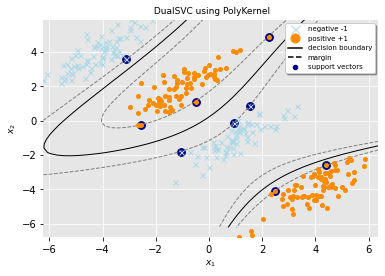

svc accuracy score is 1.0
svc found 9 support vectors from 300 examples
svc b is -0.1516004931960155

     pcost       dcost       gap    pres   dres
 0: -7.5525e+01 -9.0415e+02  6e+03  4e+00  1e-11
 1: -4.0874e+01 -6.0969e+02  1e+03  6e-01  1e-11
 2: -1.5208e+01 -2.0523e+02  4e+02  2e-01  6e-12
 3: -5.1592e+00 -6.1717e+01  1e+02  4e-02  3e-12
 4: -2.4518e+00 -3.0859e+01  5e+01  2e-02  2e-12
 5:  1.5557e-02 -9.6639e+00  1e+01  4e-03  9e-13
 6:  1.1893e-01 -2.2541e+00  3e+00  6e-04  1e-13
 7:  1.9811e-02 -2.1601e-01  2e-01  9e-06  6e-15
 8: -7.7721e-03 -1.2977e-01  1e-01  4e-06  4e-15
 9: -1.8443e-02 -1.3232e-01  1e-01  3e-06  3e-15
10: -3.3329e-02 -9.6133e-02  6e-02  1e-06  2e-15
11: -4.5865e-02 -8.1119e-02  4e-02  2e-07  3e-15
12: -5.3736e-02 -6.5400e-02  1e-02  5e-08  3e-15
13: -5.6890e-02 -5.9813e-02  3e-03  2e-09  3e-15
14: -5.8018e-02 -5.8336e-02  3e-04  1e-10  4e-15
15: -5.8149e-02 -5.8176e-02  3e-05  1e-11  4e-15
16: -5.8161e-02 -5.8162e-02  3e-07  1e-13  4e-15
17: -5.8162e-02 -

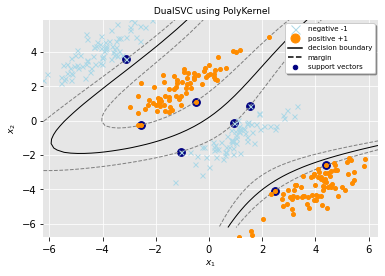

cvxopt svc accuracy score is 1.0
cvxopt svc found 8 support vectors from 300 examples
cvxopt svc b is 2.5189332368558137e-06

CPU times: user 1.7 ms, sys: 113 µs, total: 1.81 ms
Wall time: 1.82 ms


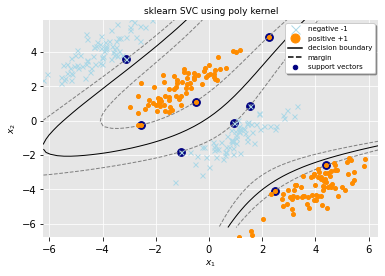

sklearn svc accuracy score is 1.0
sklearn svc found 9 support vectors from 300 examples
sklearn svc b is [-0.13687387]


In [28]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=PolyKernel(degree=3, coef0=3, gamma='auto'), C=1, optimizer=SMOClassifier, verbose=5)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=PolyKernel(degree=3, coef0=3, gamma='auto'), C=1, optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SklSVC(kernel='poly', degree=3, coef0=3, gamma='auto', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.13) is:

In [18]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-9.6727e-03	pcost:  2.0661e-02	gap:  3.0333e-02	itn:  16	r1norm: 8.0171e+00
   1	   1	-7.6453e-03	pcost:  1.3936e-02	gap:  2.1582e-02	itn:  16	r1norm: 7.1336e+00
   2	   2	-6.0430e-03	pcost:  8.8873e-03	gap:  1.4930e-02	itn:  16	r1norm: 6.3481e+00
   3	   3	-4.7765e-03	pcost:  5.1328e-03	gap:  9.9093e-03	itn:  16	r1norm: 5.6497e+00
   4	   4	-3.7755e-03	pcost:  2.3751e-03	gap:  6.1506e-03	itn:  16	r1norm: 5.0289e+00
   5	   5	-2.9842e-03	pcost:  3.8204e-04	gap:  3.3662e-03	itn:  16	r1norm: 4.4769e+00
   6	   6	-2.3587e-03	pcost: -1.0274e-03	gap:  1.3313e-03	itn:  16	r1norm: 3.9861e+00
   7	   7	-1.8643e-03	pcost: -1.9939e-03	gap: -1.2957e-04	itn:  16	r1norm: 3.5498e+00

CPU times: user 873 ms, sys: 900 ms, total: 1.77 s
Wall time: 268 ms


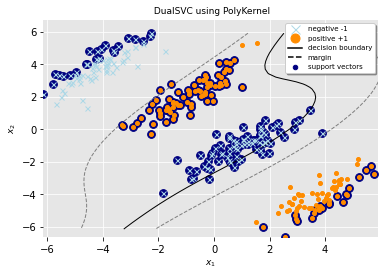

svc accuracy score is 0.75
svc found 201 support vectors from 300 examples
svc b is -0.2806929589167751


In [19]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=PolyKernel(degree=3, coef0=3, gamma='auto'), C=1, 
              optimizer=AdaGrad, use_explicit_eq=True, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.19) is:

epoch	iter	 cost	
   0	   0	-8.5825e-03	pcost:  2.3538e-02	gap:  3.2121e-02	itn:  16	r1norm: 8.4441e+00
 100	 100	-8.1578e-03	pcost:  2.1656e-02	gap:  2.9814e-02	itn:  16	r1norm: 8.8361e+00
 200	 200	-7.7857e-03	pcost:  1.9918e-02	gap:  2.7704e-02	itn:  16	r1norm: 9.2208e+00
 300	 300	-7.4471e-03	pcost:  1.8124e-02	gap:  2.5571e-02	itn:  16	r1norm: 9.5971e+00
 400	 400	-7.1348e-03	pcost:  1.6427e-02	gap:  2.3562e-02	itn:  16	r1norm: 9.9645e+00
 500	 500	-6.8456e-03	pcost:  1.4814e-02	gap:  2.1659e-02	itn:  16	r1norm: 1.0323e+01
 600	 600	-6.5770e-03	pcost:  1.3288e-02	gap:  1.9865e-02	itn:  16	r1norm: 1.0672e+01
 700	 700	-6.3274e-03	pcost:  1.1914e-02	gap:  1.8241e-02	itn:  17	r1norm: 1.1011e+01
 800	 800	-6.0953e-03	pcost:  1.0657e-02	gap:  1.6753e-02	itn:  16	r1norm: 1.1341e+01
 900	 900	-5.8792e-03	pcost:  9.4832e-03	gap:  1.5362e-02	itn:  16	r1norm: 1.1663e+01

CPU times: user 44.7 s, sys: 38.4 s, total: 1min 23s
Wall time: 11.3 s


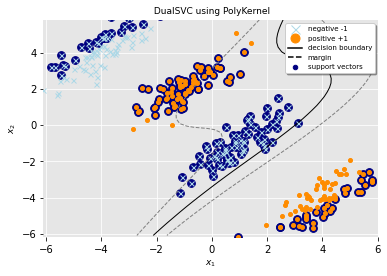

svc accuracy score is 0.75
svc found 199 support vectors from 300 examples
svc b is -0.9033518667596958


In [20]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=PolyKernel(degree=3, coef0=3, gamma='auto'), C=1, 
              optimizer=AdaGrad, use_explicit_eq=False, verbose=100)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

#### Support Vector Regression

In [2]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.smo import SMORegression
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from sklearn.svm import SVR as SklSVR
from sklearn.model_selection import train_test_split

CPU times: user 28min 51s, sys: 179 ms, total: 28min 51s
Wall time: 28min 51s


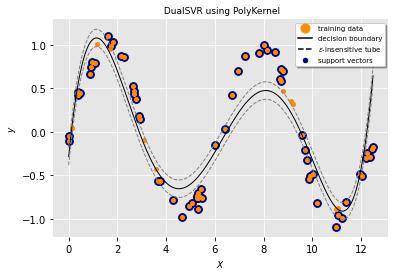

svr r2 score is 0.8866781000272429
svr found 65 support vectors from 75 examples
svr b is -0.2984941354199902

     pcost       dcost       gap    pres   dres
 0: -2.6829e+00 -1.9707e+02  2e+02  3e-17  4e-10
 1: -5.4548e+00 -2.5355e+01  2e+01  1e-16  4e-10
 2: -1.1473e+01 -1.6126e+01  5e+00  2e-16  4e-10
 3: -1.2899e+01 -1.4323e+01  1e+00  2e-16  4e-10
 4: -1.3431e+01 -1.3735e+01  3e-01  2e-16  3e-10
 5: -1.3518e+01 -1.3623e+01  1e-01  2e-16  3e-10
 6: -1.3560e+01 -1.3574e+01  1e-02  2e-16  4e-10
 7: -1.3566e+01 -1.3567e+01  7e-04  1e-16  4e-10
 8: -1.3567e+01 -1.3567e+01  7e-06  2e-16  4e-10
Optimal solution found.

CPU times: user 68.9 ms, sys: 52 ms, total: 121 ms
Wall time: 19.2 ms


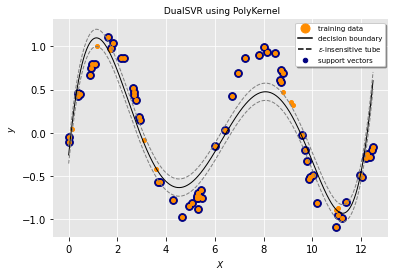

cvxopt svr r2 score is 0.8831486000403188
cvxopt svr found 65 support vectors from 75 examples
cvxopt svr b is 0.025836426934174643

CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.02 s


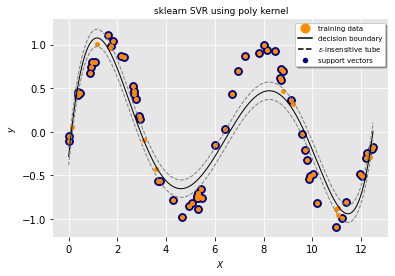

sklearn svr r2 score is 0.8817037899796948
sklearn svr found 64 support vectors from 75 examples
sklearn svr b is [-0.29943022]


In [7]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=PolyKernel(degree=5, coef0=4, gamma='scale'), 
              epsilon=0.1, C=1, optimizer=SMORegression, verbose=False)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

print()

svr = DualSVR(kernel=PolyKernel(degree=5, coef0=4, gamma='scale'), 
              epsilon=0.1, C=1, optimizer='cvxopt', verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'cvxopt svr r2 score is {svr.score(X_test, y_test)}')
print(f'cvxopt svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svr b is {svr.intercept_}')

print()

svr = SklSVR(kernel='poly', degree=5, coef0=4, gamma='scale', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.13) is:

In [21]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-4.6099e+00	pcost: -2.7730e+00	gap:  6.6241e-01	itn:  11	r1norm: 2.6527e+00
   1	   1	-3.9561e+00	pcost: -2.7730e+00	gap:  4.2663e-01	itn:  11	r1norm: 2.3618e+00
   2	   2	-3.5389e+00	pcost: -2.7730e+00	gap:  2.7619e-01	itn:  11	r1norm: 2.2481e+00
   3	   3	-3.2233e+00	pcost: -2.7730e+00	gap:  1.6236e-01	itn:  12	r1norm: 2.2166e+00
   4	   4	-2.9670e+00	pcost: -2.7730e+00	gap:  6.9934e-02	itn:  11	r1norm: 2.2334e+00
   5	   5	-2.7506e+00	pcost: -2.7730e+00	gap: -8.0984e-03	itn:  11	r1norm: 2.2806e+00

CPU times: user 528 ms, sys: 502 ms, total: 1.03 s
Wall time: 156 ms


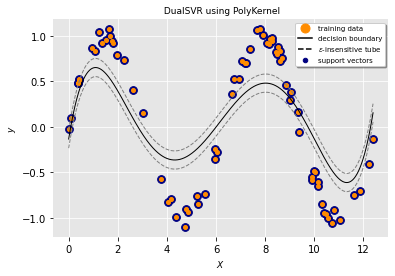

svr r2 score is 0.7177130256860678
svr found 75 support vectors from 75 examples
svr b is 0.06275731744703891


In [22]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=PolyKernel(degree=5, coef0=4, gamma='scale'), epsilon=0.1, 
              C=1, optimizer=AdaGrad, use_explicit_eq=True, verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.19) is:

epoch	iter	 cost	
   0	   0	-5.1316e+00	pcost: -3.0572e+00	gap:  6.7855e-01	itn:  11	r1norm: 3.1583e+00
   1	   1	-4.3760e+00	pcost: -3.0572e+00	gap:  4.3139e-01	itn:  11	r1norm: 2.9433e+00
   2	   2	-3.8963e+00	pcost: -3.0572e+00	gap:  2.7447e-01	itn:  11	r1norm: 2.8695e+00
   3	   3	-3.5345e+00	pcost: -3.0572e+00	gap:  1.5614e-01	itn:  14	r1norm: 2.8579e+00
   4	   4	-3.2416e+00	pcost: -3.0572e+00	gap:  6.0338e-02	itn:  11	r1norm: 2.8818e+00
   5	   5	-2.9950e+00	pcost: -3.0572e+00	gap: -2.0328e-02	itn:  11	r1norm: 2.9279e+00

CPU times: user 877 ms, sys: 924 ms, total: 1.8 s
Wall time: 262 ms


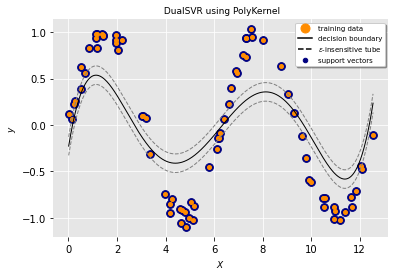

svr r2 score is 0.669907059281323
svr found 75 support vectors from 75 examples
svr b is -0.01467337305146985


In [23]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=PolyKernel(degree=5, coef0=4, gamma='scale'), epsilon=0.1, 
              C=1, optimizer=AdaGrad, use_explicit_eq=False, verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

### Gaussian RBF Kernel

The *gaussian* kernel is defined as:

$$k(x_{i},x_{j})=\exp(-\frac{\|x_i-x_j\|^2}{2\sigma^2})$$

or, equivalently, as:

$$k(x_{i},x_{j})=\exp(-\gamma \|x_i-x_j\|^2)$$

where $\displaystyle \gamma=\frac{1}{2\sigma^2}$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma*.

#### Support Vector Classifier

In [37]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SklSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-7.9397e+00
   1	-8.9948e+00
   2	-9.2345e+00
   3	-9.2951e+00
   4	-9.3069e+00
   5	-9.3090e+00
   6	-9.3101e+00
   7	-9.3109e+00
   8	-9.3110e+00
   9	-9.3110e+00
  10	-9.9283e+00
  11	-9.9812e+00
  12	-9.9886e+00
  13	-9.9905e+00
  14	-9.9909e+00
  15	-9.9911e+00
  16	-9.9913e+00
  17	-9.9913e+00
  18	-9.9913e+00
  19	-9.9913e+00

CPU times: user 1.74 s, sys: 1.67 s, total: 3.41 s
Wall time: 1.25 s


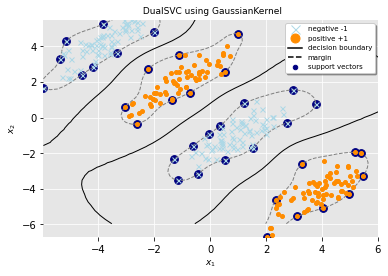

svc accuracy score is 1.0
svc found 38 support vectors from 300 examples
svc b is 0.0023505415660284154

     pcost       dcost       gap    pres   dres
 0: -5.4048e+00 -3.5282e+02  1e+03  1e+00  4e-16
 1:  6.2420e-01 -1.2827e+02  1e+02  3e-16  5e-16
 2: -7.2894e+00 -2.2038e+01  1e+01  2e-16  6e-16
 3: -8.6407e+00 -1.3753e+01  5e+00  2e-16  3e-16
 4: -9.4371e+00 -1.1340e+01  2e+00  2e-16  2e-16
 5: -9.8244e+00 -1.0317e+01  5e-01  2e-16  2e-16
 6: -9.9574e+00 -1.0044e+01  9e-02  2e-16  2e-16
 7: -9.9905e+00 -9.9925e+00  2e-03  2e-16  3e-16
 8: -9.9914e+00 -9.9914e+00  4e-05  2e-16  3e-16
 9: -9.9914e+00 -9.9914e+00  1e-06  2e-16  2e-16
Optimal solution found.

CPU times: user 254 ms, sys: 316 ms, total: 570 ms
Wall time: 149 ms


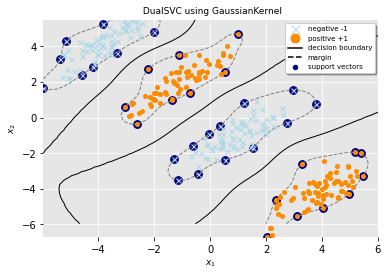

cvxopt svc accuracy score is 1.0
cvxopt svc found 38 support vectors from 300 examples
cvxopt svc b is 8.856233047003694e-05

CPU times: user 2.91 ms, sys: 7 µs, total: 2.92 ms
Wall time: 2.67 ms


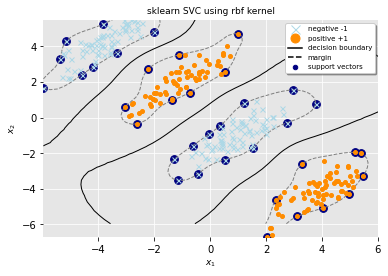

sklearn svc accuracy score is 1.0
sklearn svc found 38 support vectors from 300 examples
sklearn svc b is [0.00216921]


In [38]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=1, optimizer=SMOClassifier, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=1, optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SklSVC(kernel='rbf', gamma='auto', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.13) is:

In [24]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-1.3572e+01	pcost:  2.8917e+02	gap:  1.0469e+00	itn: 600	r1norm: 1.2290e-01
   5	   5	-4.8632e+01	pcost:  2.8917e+02	gap:  1.1682e+00	itn: 600	r1norm: 6.2390e-01
  10	  10	-9.0777e+00	pcost:  2.8917e+02	gap:  1.0314e+00	itn: 600	r1norm: 4.3721e-01
  15	  15	-1.1888e+00	pcost: -3.5108e+00	gap: -6.6139e-01	itn: 600	r1norm: 3.7879e-01

CPU times: user 25 s, sys: 21.2 s, total: 46.2 s
Wall time: 6.28 s


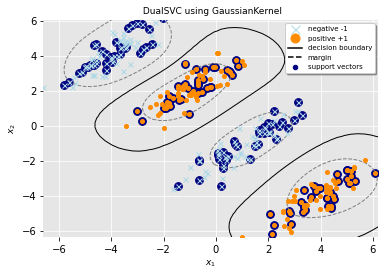

svc accuracy score is 1.0
svc found 152 support vectors from 300 examples
svc b is -0.07508921870585668


In [25]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=1, optimizer=AdaGrad, use_explicit_eq=True, verbose=5)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.19) is:

epoch	iter	 cost	
   0	   0	-6.6777e+01	pcost:  5.9457e+02	gap:  1.1123e+00	itn: 600	r1norm: 1.1705e+00
  10	  10	-2.6460e+01	pcost:  5.7346e+02	gap:  1.0461e+00	itn: 600	r1norm: 1.2676e+00
  20	  20	-1.5600e+01	pcost:  4.9713e+01	gap:  1.3138e+00	itn: 600	r1norm: 1.1736e+00
  30	  30	-1.4752e+01	pcost:  1.3419e+01	gap:  2.0993e+00	itn: 600	r1norm: 1.1214e+00
  40	  40	-1.2585e+01	pcost:  3.2546e+00	gap:  4.8670e+00	itn: 600	r1norm: 1.0803e+00
  50	  50	-1.1864e+01	pcost: -2.3334e+00	gap:  4.0843e+00	itn: 600	r1norm: 1.0380e+00
  60	  60	-1.2051e+01	pcost: -4.5643e+00	gap:  1.6402e+00	itn: 600	r1norm: 1.0021e+00
  70	  70	-1.1535e+01	pcost: -5.8687e+00	gap:  9.6550e-01	itn: 600	r1norm: 9.7166e-01
  80	  80	-1.1203e+01	pcost: -7.7267e+00	gap:  4.4989e-01	itn: 600	r1norm: 9.4705e-01
  90	  90	-1.1027e+01	pcost: -8.5976e+00	gap:  2.8254e-01	itn: 600	r1norm: 9.2606e-01
 100	 100	-1.0863e+01	pcost: -8.8235e+00	gap:  2.3120e-01	itn: 600	r1norm: 9.0861e-01
 110	 110	-1.0760e+01	pcost: -9.5591

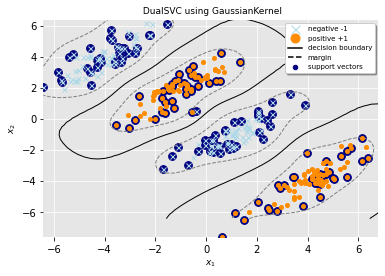

svc accuracy score is 1.0
svc found 151 support vectors from 300 examples
svc b is -0.045606649683571795


In [26]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=1, optimizer=AdaGrad, use_explicit_eq=False, verbose=10)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

#### Support Vector Regression

In [41]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.smo import SMORegression
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from sklearn.svm import SVR as SklSVR
from sklearn.model_selection import train_test_split

iter	 cost
   0	-1.9256e+00
   2	-2.0759e+00
   4	-2.1433e+00
   6	-2.1616e+00
   8	-2.1638e+00
  10	-2.1651e+00
  12	-2.1663e+00
  14	-2.1683e+00
  16	-2.1687e+00
  18	-2.1688e+00
  20	-2.1690e+00
  22	-2.1691e+00
  24	-2.2188e+00
  26	-2.2277e+00
  28	-2.2278e+00
  30	-2.2289e+00
  32	-2.2292e+00
  34	-2.2293e+00
  36	-2.2293e+00

CPU times: user 619 ms, sys: 751 ms, total: 1.37 s
Wall time: 394 ms


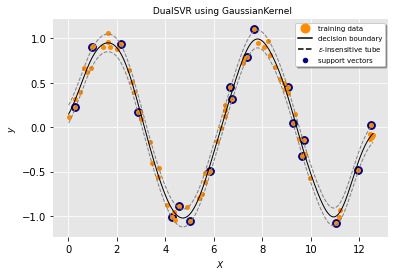

svr r2 score is 0.9888205130479949
svr found 19 support vectors from 75 examples
svr b is -0.0006708129803801938

     pcost       dcost       gap    pres   dres
 0:  4.2236e+00 -1.7394e+02  2e+02  4e-17  7e-15
 1:  3.3939e+00 -9.9155e+00  1e+01  1e-16  9e-15
 2: -1.2691e+00 -3.2637e+00  2e+00  2e-16  7e-15
 3: -2.0014e+00 -2.5227e+00  5e-01  2e-16  3e-15
 4: -2.1569e+00 -2.3234e+00  2e-01  2e-16  2e-15
 5: -2.2128e+00 -2.2491e+00  4e-02  2e-16  1e-15
 6: -2.2260e+00 -2.2337e+00  8e-03  2e-16  1e-15
 7: -2.2292e+00 -2.2299e+00  7e-04  2e-16  1e-15
 8: -2.2295e+00 -2.2295e+00  2e-05  2e-16  1e-15
 9: -2.2295e+00 -2.2295e+00  5e-07  2e-16  1e-15
Optimal solution found.

CPU times: user 117 ms, sys: 132 ms, total: 249 ms
Wall time: 62.1 ms


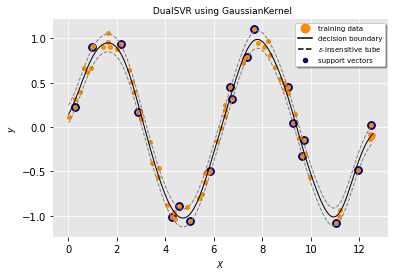

cvxopt svr r2 score is 0.9886525513403863
cvxopt svr found 19 support vectors from 75 examples
cvxopt svr b is -0.004490864602625174

CPU times: user 1.03 ms, sys: 0 ns, total: 1.03 ms
Wall time: 1.04 ms


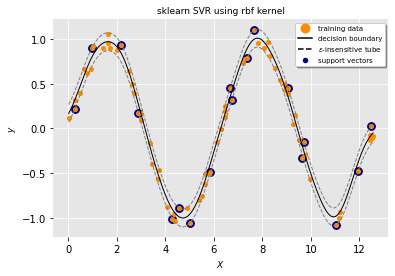

sklearn svr r2 score is 0.988723190582149
sklearn svr found 18 support vectors from 75 examples
sklearn svr b is [0.02027178]


In [42]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=GaussianKernel(gamma='auto'), epsilon=0.1, C=1, optimizer=SMORegression, verbose=2)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

print()

svr = DualSVR(kernel=GaussianKernel(gamma='auto'), epsilon=0.1, C=1, optimizer='cvxopt', verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'cvxopt svr r2 score is {svr.score(X_test, y_test)}')
print(f'cvxopt svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svr b is {svr.intercept_}')

print()

svr = SklSVR(kernel='rbf', gamma='auto', C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.13) is:

In [27]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-7.1026e+01	pcost:  7.5000e+00	gap:  1.0470e+01	itn: 247	r1norm: 1.3954e+00
 100	 100	-1.0660e+01	pcost:  5.4262e+00	gap:  2.9645e+00	itn: 106	r1norm: 1.3909e+00
 200	 200	-9.2145e+00	pcost:  2.6256e-02	gap:  9.2408e+00	itn:  72	r1norm: 1.3390e+00
 300	 300	-8.2803e+00	pcost: -7.0064e-01	gap:  7.5796e+00	itn:  88	r1norm: 1.2882e+00
 400	 400	-7.4694e+00	pcost: -8.4878e-01	gap:  6.6206e+00	itn: 116	r1norm: 1.2398e+00
 500	 500	-6.7722e+00	pcost: -9.3663e-01	gap:  5.8356e+00	itn: 111	r1norm: 1.1982e+00
 600	 600	-6.1375e+00	pcost: -9.6647e-01	gap:  5.1710e+00	itn: 105	r1norm: 1.1613e+00
 700	 700	-5.5595e+00	pcost: -9.7344e-01	gap:  4.5860e+00	itn:  89	r1norm: 1.1288e+00
 800	 800	-5.0862e+00	pcost: -9.7344e-01	gap:  4.1128e+00	itn:  89	r1norm: 1.1007e+00
 900	 900	-4.6774e+00	pcost: -9.8094e-01	gap:  3.6965e+00	itn:  88	r1norm: 1.0760e+00

CPU times: user 3min 27s, sys: 2min 59s, total: 6min 26s
Wall time: 50.2 s


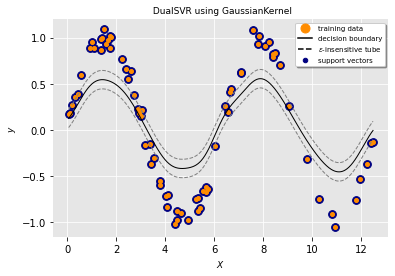

svr r2 score is 0.6844083078556515
svr found 75 support vectors from 75 examples
svr b is 0.04998281620328394


In [28]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=GaussianKernel(gamma='auto'), epsilon=0.1, C=1, 
              optimizer=AdaGrad, use_explicit_eq=True, verbose=100)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.19) is:

epoch	iter	 cost	
   0	   0	-2.0608e+02	pcost:  7.5000e+00	gap:  2.8478e+01	itn: 236	r1norm: 1.3981e+00
 100	 100	-1.0903e+01	pcost:  1.8166e+00	gap:  7.0021e+00	itn: 101	r1norm: 1.3399e+00
 200	 200	-9.8455e+00	pcost: -7.0114e-01	gap:  9.1444e+00	itn:  86	r1norm: 1.2846e+00
 300	 300	-8.9952e+00	pcost: -1.1107e+00	gap:  7.0989e+00	itn:  84	r1norm: 1.2307e+00
 400	 400	-8.2308e+00	pcost: -1.1798e+00	gap:  5.9762e+00	itn:  83	r1norm: 1.1808e+00
 500	 500	-7.5177e+00	pcost: -1.1968e+00	gap:  5.2817e+00	itn:  86	r1norm: 1.1361e+00
 600	 600	-6.8823e+00	pcost: -1.2780e+00	gap:  4.3854e+00	itn:  86	r1norm: 1.0956e+00
 700	 700	-6.3351e+00	pcost: -1.3110e+00	gap:  3.8323e+00	itn:  85	r1norm: 1.0588e+00
 800	 800	-5.8586e+00	pcost: -1.3448e+00	gap:  3.3567e+00	itn:  84	r1norm: 1.0279e+00
 900	 900	-5.4536e+00	pcost: -1.3448e+00	gap:  3.0555e+00	itn:  87	r1norm: 1.0006e+00

CPU times: user 3min 17s, sys: 2min 55s, total: 6min 13s
Wall time: 50.4 s


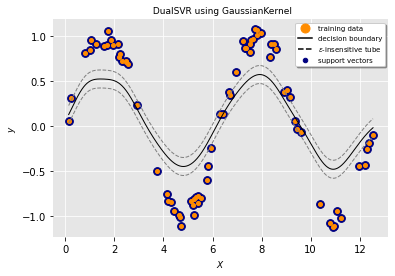

svr r2 score is 0.7375462840325138
svr found 75 support vectors from 75 examples
svr b is 0.053566765399137586


In [29]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=GaussianKernel(gamma='auto'), epsilon=0.1, C=1, 
              optimizer=AdaGrad, use_explicit_eq=False, verbose=100)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

## Conclusions

For what about the SVM formulations, it is known, in general, that the *primal* formulation, is suitable for large linear training since the complexity of the model grows with the number of features or, more in general, when the number of examples $n$ is much larger than the number of features $m$, $n \gt\gt m$; meanwhile the *dual* formulation, is more suitable in case the number of examples $n$ is less than the number of features $m$, $n \lt m$, since the complexity of the model is dominated by the number of examples.

From all these experiments we can see that *cvxopt* underperform the *sklearn* implementation in terms of time since it is a general-purpose QP solver and it doesn't exploit the structure of the problem. In the field of numerical optimization, it is known that if you are looking for better performance you should use a better model, so ad-hoc implementations able to embed the knowledge of the specific problem are welcome. 
Despite this, the *custom* implementation does not overperform the *cvxopt* probably due to the tradeoff generated from the different core implementations, Python and C respectively.
For these reasons, *sklearn* provides better results in terms of time wrt the other implementations since it is designed to work in a large-scale context and its core is implemented in C.

Important consideration involves the number of support vector machines: the *Lagrangian dual* formulation tends to select all the data points as support vectors, so it makes the model complex and unable to generalize. In fact, the scores are lower wrt the equivalent *Wolfe dual* formulation.

## References

[[1]](#ref-1) [J. Duchi, E. Hazan, Y. Singer. _Adaptive Subgradient Methods for Online Learning and Stochastic Optimization._](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)

[[2]](#ref-2) [J.C. Platt. _Sequential Minimal Optimization: A Fast Algorithm for Training Support Vector Machines._](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf)

[[3]](#ref-3) [S.S. Keerthi, S.K. Shevade, C. Bhattacharyya, K.R.K. Murthy. _Improvements to Platt's SMO Algorithm for SVM Classifier Design._](http://web.cs.iastate.edu/~honavar/keerthi-svm.pdf)

[[4]](#ref-4) [G.W. Flake, S. Lawrence. _Efficient SVM Regression Training with SMO._](https://link.springer.com/content/pdf/10.1023/A:1012474916001.pdf)

[[5]](#ref-5) [S.K. Shevade, S.S. Keerthi, C. Bhattacharyya, K.R.K. Murthy. _Improvements to SMO Algorithm for SVM Regression._](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.27.8961&rep=rep1&type=pdf)

[[6]](#ref-6) [C.W. Hsu, C.J. Lin. _A simple decomposition method for support vector machines._](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.126.4700&rep=rep1&type=pdf)

[[7]](#ref-7) [T. Fletcher. _Support Vector Machines Explained._](https://static1.squarespace.com/static/58851af9ebbd1a30e98fb283/t/58902fbae4fcb5398aeb7505/1485844411772/SVM+Explained.pdf)